# C23-PR588 AUD/IDR, GBP/IDR, SGD/IDR DNN MODEL (BEST MODEL) 7 DAYS PREDICTION

Import necessary libraries

In [8]:
%run helper_functions_and_libraries.py
logging.set_verbosity(logging.ERROR)

Begin by looking at the structure of the csv that contains the data:

In [9]:
CURRENCIES_CSV = './currency_data_10_years.csv'

# Create dataframe by using datas from csv file
currencies_df = pd.read_csv(CURRENCIES_CSV)

# Create new dataframe containing ONLY needed data for the model
aud_idr_df = currencies_df[['date', 'AUD']]
gbp_idr_df = currencies_df[['date', 'GBP']]
sgd_idr_df = currencies_df[['date', 'SGD']]

# Displaying the first and last 5 row of data to understand the contents of the data
display(aud_idr_df.head())
display(gbp_idr_df.head())
display(sgd_idr_df.head())

,date,AUD
0,2013-05-01,9991.932116
1,2013-05-02,9976.629029
2,2013-05-03,10024.671009
3,2013-05-04,10037.051582
4,2013-05-05,9999.337595


,date,GBP
0,2013-05-01,15125.789759
1,2013-05-02,15096.787469
2,2013-05-03,15125.784565
3,2013-05-04,15148.170100
4,2013-05-05,15097.625177


,date,SGD
0,2013-05-01,7884.025975
1,2013-05-02,7878.089194
2,2013-05-03,7879.444847
3,2013-05-04,7886.016560
4,2013-05-05,7859.545641


Each data point is composed of the date and the recorded exchange rate from AUD, GBP, and SGD to IDR

## Parsing the raw data
Read the data from the csv file and Creating global (G) dataclass

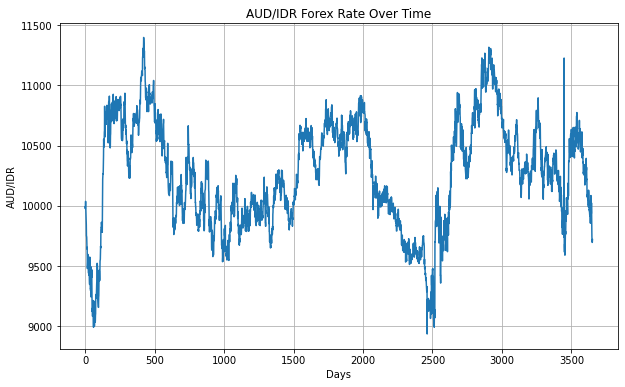

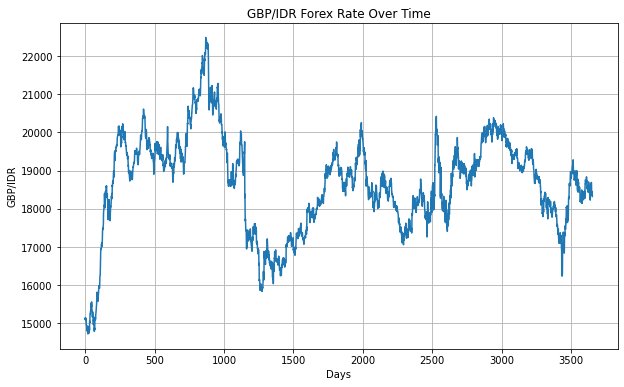

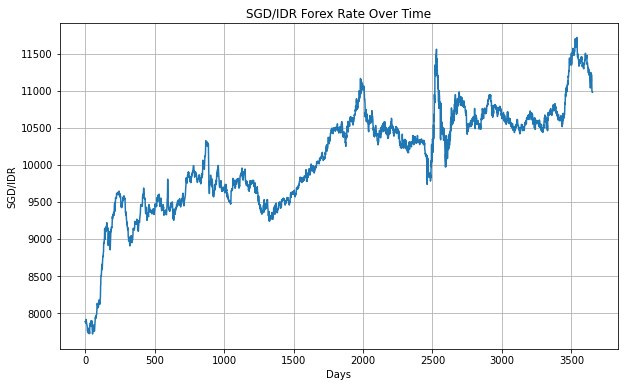

In [10]:
# Test your function and save all "global" variables within the G class (G stands for global)
@dataclass
class G:
    
    DATAFRAME_AUD = aud_idr_df
    DATAFRAME_GBP = gbp_idr_df
    DATAFRAME_SGD = sgd_idr_df

    aud_times, aud_series = parse_data_from_df(DATAFRAME_AUD, 'AUD')
    gbp_times, gbp_series = parse_data_from_df(DATAFRAME_GBP, 'GBP')
    sgd_times, sgd_series = parse_data_from_df(DATAFRAME_SGD, 'SGD')

    SPLIT_TIME = int(math.floor(len(aud_series)*0.8))
    WINDOW_SIZE = 30
    BATCH_SIZE = 32
    SHUFFLE_BUFFER_SIZE = 1000

plt.figure(figsize=(10, 6))
plot_series(G.aud_times, G.aud_series, title="AUD/IDR Forex Rate Over Time", xlabel="Days", ylabel="AUD/IDR")

plt.figure(figsize=(10, 6))
plot_series(G.gbp_times, G.gbp_series, title="GBP/IDR Forex Rate Over Time", xlabel="Days", ylabel="GBP/IDR")

plt.figure(figsize=(10, 6))
plot_series(G.sgd_times, G.sgd_series, title="SGD/IDR Forex Rate Over Time", xlabel="Days", ylabel="SGD/IDR")

## Processing the data

train_val_split and windowed_dataset functions taken from 'tensorflow-sequences-time-series-and-prediction' courses in Coursera

In [11]:
# Split the dataset
aud_time_train, aud_series_train, aud_time_valid, aud_series_valid = train_val_split(G.aud_times, G.aud_series, G.SPLIT_TIME, None)
gbp_time_train, gbp_series_train, gbp_time_valid, gbp_series_valid = train_val_split(G.gbp_times, G.gbp_series, G.SPLIT_TIME, None)
sgd_time_train, sgd_series_train, sgd_time_valid, sgd_series_valid = train_val_split(G.sgd_times, G.sgd_series, G.SPLIT_TIME, None)

In [12]:
# Apply the transformation to the training set
aud_train_set = windowed_dataset(aud_series_train, window_size=G.WINDOW_SIZE, batch_size=G.BATCH_SIZE, shuffle_buffer=G.SHUFFLE_BUFFER_SIZE)
aud_valid_set = windowed_dataset(aud_series_valid, window_size=G.WINDOW_SIZE, batch_size=G.BATCH_SIZE, shuffle_buffer=G.SHUFFLE_BUFFER_SIZE)

gbp_train_set = windowed_dataset(gbp_series_train, window_size=G.WINDOW_SIZE, batch_size=G.BATCH_SIZE, shuffle_buffer=G.SHUFFLE_BUFFER_SIZE)
gbp_valid_set = windowed_dataset(gbp_series_valid, window_size=G.WINDOW_SIZE, batch_size=G.BATCH_SIZE, shuffle_buffer=G.SHUFFLE_BUFFER_SIZE)

sgd_train_set = windowed_dataset(sgd_series_train, window_size=G.WINDOW_SIZE, batch_size=G.BATCH_SIZE, shuffle_buffer=G.SHUFFLE_BUFFER_SIZE)
sgd_valid_set = windowed_dataset(sgd_series_valid, window_size=G.WINDOW_SIZE, batch_size=G.BATCH_SIZE, shuffle_buffer=G.SHUFFLE_BUFFER_SIZE)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosi

## Defining the model architecture

Using 5 layers model

In [13]:
def create_model_5_layers(model_name):
    
    # Build the model
    model = tf.keras.models.Sequential([
        
        tf.keras.layers.Dense(256, input_shape=[G.WINDOW_SIZE], activation="relu"),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(32, activation="relu"),
        tf.keras.layers.Dense(1)

    ], name=f"{model_name}_model_5_layers")

    return model

In [14]:
# Create and test model
aud_model_5_layers = create_model_5_layers(model_name='AUD')

# Get initial weights
init_weights = aud_model_5_layers.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
aud_model_5_layers.set_weights(init_weights)

# Print the model summary
aud_model_5_layers.summary()

Model: "AUD_model_5_layers"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               7936      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 51,201
Trainable params: 51,201
Non-trainable params: 0
_________________________________________________________________


## Compiling the model

In [15]:
def compile_model(train_set, model_to_train, valid_set):

    model = model_to_train
    
    # Select optimizer
    optimizer = tf.keras.optimizers.Adam()
    
    # Compile the model passing in the appropriate loss
    model.compile(loss=tf.keras.losses.Huber(),
                  optimizer=optimizer,
                  metrics=['mae'])
    
    # Train the model
    history = model.fit(train_set,
                        epochs=100, 
                        verbose=1,
                        batch_size=G.BATCH_SIZE,
                        validation_data=valid_set,
                        callbacks=[create_model_checkpoint(save_path='fixed_model')])

    return history

# Run the training with dynamic LR
history_aud_5_layers = compile_model(aud_train_set, aud_model_5_layers, aud_valid_set)

Epoch 1/100
     90/Unknown - 1s 3ms/step - loss: 652.5372 - mae: 653.0367INFO:tensorflow:Assets written to: fixed_model/1\assets


INFO:tensorflow:Assets written to: fixed_model/1\assets


91/91 [==============================] - 4s 36ms/step - loss: 650.7177 - mae: 651.2172 - val_loss: 109.8199 - val_mae: 110.3193
Epoch 2/100
91/91 [==============================] - 1s 5ms/step - loss: 144.4087 - mae: 144.9075 - val_loss: 255.8995 - val_mae: 256.3991
Epoch 3/100
76/91 [========================>.....] - ETA: 0s - loss: 156.9743 - mae: 157.4737INFO:tensorflow:Assets written to: fixed_model/1\assets


INFO:tensorflow:Assets written to: fixed_model/1\assets


91/91 [==============================] - 2s 16ms/step - loss: 149.0161 - mae: 149.5155 - val_loss: 107.7994 - val_mae: 108.2989
Epoch 4/100
91/91 [==============================] - 1s 5ms/step - loss: 126.1363 - mae: 126.6353 - val_loss: 145.2760 - val_mae: 145.7760
Epoch 5/100
91/91 [==============================] - 1s 5ms/step - loss: 140.2390 - mae: 140.7378 - val_loss: 144.6208 - val_mae: 145.1208
Epoch 6/100
91/91 [==============================] - 1s 5ms/step - loss: 143.1393 - mae: 143.6385 - val_loss: 316.8711 - val_mae: 317.3711
Epoch 7/100
91/91 [==============================] - 1s 5ms/step - loss: 178.6682 - mae: 179.1680 - val_loss: 191.3190 - val_mae: 191.8185
Epoch 8/100
91/91 [==============================] - 1s 5ms/step - loss: 143.8144 - mae: 144.3137 - val_loss: 119.6875 - val_mae: 120.1867
Epoch 9/100
91/91 [==============================] - 1s 5ms/step - loss: 124.5460 - mae: 125.0455 - val_loss: 224.4769 - val_mae: 224.9769
Epoch 10/100
91/91 [==================

INFO:tensorflow:Assets written to: fixed_model/1\assets


91/91 [==============================] - 1s 13ms/step - loss: 112.9491 - mae: 113.4487 - val_loss: 87.1398 - val_mae: 87.6378
Epoch 15/100
91/91 [==============================] - 1s 5ms/step - loss: 121.1111 - mae: 121.6098 - val_loss: 138.0644 - val_mae: 138.5641
Epoch 16/100
82/91 [==========================>...] - ETA: 0s - loss: 112.8180 - mae: 113.3174INFO:tensorflow:Assets written to: fixed_model/1\assets


INFO:tensorflow:Assets written to: fixed_model/1\assets


91/91 [==============================] - 1s 13ms/step - loss: 111.6583 - mae: 112.1575 - val_loss: 83.1424 - val_mae: 83.6401
Epoch 17/100
82/91 [==========================>...] - ETA: 0s - loss: 123.9210 - mae: 124.4203INFO:tensorflow:Assets written to: fixed_model/1\assets


INFO:tensorflow:Assets written to: fixed_model/1\assets


91/91 [==============================] - 1s 13ms/step - loss: 124.6193 - mae: 125.1186 - val_loss: 81.7016 - val_mae: 82.2002
Epoch 18/100
91/91 [==============================] - 1s 5ms/step - loss: 133.7789 - mae: 134.2784 - val_loss: 153.2798 - val_mae: 153.7788
Epoch 19/100
91/91 [==============================] - 1s 5ms/step - loss: 102.2220 - mae: 102.7210 - val_loss: 97.4135 - val_mae: 97.9127
Epoch 20/100
91/91 [==============================] - 1s 5ms/step - loss: 122.7191 - mae: 123.2185 - val_loss: 211.9315 - val_mae: 212.4313
Epoch 21/100
91/91 [==============================] - 1s 5ms/step - loss: 112.6713 - mae: 113.1703 - val_loss: 170.9233 - val_mae: 171.4233
Epoch 22/100
91/91 [==============================] - 1s 5ms/step - loss: 114.2397 - mae: 114.7381 - val_loss: 88.6142 - val_mae: 89.1121
Epoch 23/100
91/91 [==============================] - 1s 5ms/step - loss: 94.9341 - mae: 95.4329 - val_loss: 103.4294 - val_mae: 103.9282
Epoch 24/100
91/91 [====================

INFO:tensorflow:Assets written to: fixed_model/1\assets


91/91 [==============================] - 1s 13ms/step - loss: 95.0831 - mae: 95.5814 - val_loss: 74.5017 - val_mae: 74.9996
Epoch 29/100
91/91 [==============================] - 1s 4ms/step - loss: 107.0038 - mae: 107.5028 - val_loss: 165.3419 - val_mae: 165.8419
Epoch 30/100
91/91 [==============================] - 1s 5ms/step - loss: 111.3964 - mae: 111.8953 - val_loss: 304.5639 - val_mae: 305.0639
Epoch 31/100
91/91 [==============================] - 1s 4ms/step - loss: 116.8509 - mae: 117.3498 - val_loss: 238.6543 - val_mae: 239.1543
Epoch 32/100
91/91 [==============================] - 1s 5ms/step - loss: 102.2184 - mae: 102.7171 - val_loss: 141.7378 - val_mae: 142.2371
Epoch 33/100
91/91 [==============================] - 1s 4ms/step - loss: 100.1183 - mae: 100.6177 - val_loss: 84.0506 - val_mae: 84.5489
Epoch 34/100
91/91 [==============================] - 1s 4ms/step - loss: 168.2760 - mae: 168.7754 - val_loss: 165.2585 - val_mae: 165.7585
Epoch 35/100
82/91 [==================

INFO:tensorflow:Assets written to: fixed_model/1\assets


91/91 [==============================] - 1s 13ms/step - loss: 106.6040 - mae: 107.1031 - val_loss: 73.4949 - val_mae: 73.9935
Epoch 36/100
91/91 [==============================] - 1s 5ms/step - loss: 110.4764 - mae: 110.9752 - val_loss: 115.9519 - val_mae: 116.4504
Epoch 37/100
91/91 [==============================] - 1s 5ms/step - loss: 97.3331 - mae: 97.8326 - val_loss: 97.2102 - val_mae: 97.7093
Epoch 38/100
91/91 [==============================] - 1s 4ms/step - loss: 108.6818 - mae: 109.1808 - val_loss: 212.2794 - val_mae: 212.7794
Epoch 39/100
91/91 [==============================] - 1s 5ms/step - loss: 106.9917 - mae: 107.4909 - val_loss: 79.8980 - val_mae: 80.3959
Epoch 40/100
91/91 [==============================] - 1s 5ms/step - loss: 92.5633 - mae: 93.0628 - val_loss: 130.5022 - val_mae: 131.0014
Epoch 41/100
91/91 [==============================] - 1s 5ms/step - loss: 84.9570 - mae: 85.4561 - val_loss: 85.7306 - val_mae: 86.2300
Epoch 42/100
86/91 [==========================

INFO:tensorflow:Assets written to: fixed_model/1\assets


91/91 [==============================] - 1s 15ms/step - loss: 97.8338 - mae: 98.3327 - val_loss: 72.3525 - val_mae: 72.8515
Epoch 43/100
79/91 [=========================>....] - ETA: 0s - loss: 94.0113 - mae: 94.5098INFO:tensorflow:Assets written to: fixed_model/1\assets


INFO:tensorflow:Assets written to: fixed_model/1\assets


91/91 [==============================] - 1s 13ms/step - loss: 91.4235 - mae: 91.9220 - val_loss: 70.7745 - val_mae: 71.2724
Epoch 44/100
84/91 [==========================>...] - ETA: 0s - loss: 90.1931 - mae: 90.6912INFO:tensorflow:Assets written to: fixed_model/1\assets


INFO:tensorflow:Assets written to: fixed_model/1\assets


91/91 [==============================] - 1s 12ms/step - loss: 88.2761 - mae: 88.7743 - val_loss: 69.4143 - val_mae: 69.9140
Epoch 45/100
91/91 [==============================] - 1s 5ms/step - loss: 111.8801 - mae: 112.3792 - val_loss: 187.1712 - val_mae: 187.6711
Epoch 46/100
91/91 [==============================] - 1s 5ms/step - loss: 103.1303 - mae: 103.6288 - val_loss: 76.9560 - val_mae: 77.4550
Epoch 47/100
91/91 [==============================] - 1s 5ms/step - loss: 81.3338 - mae: 81.8323 - val_loss: 73.8338 - val_mae: 74.3337
Epoch 48/100
76/91 [========================>.....] - ETA: 0s - loss: 92.7492 - mae: 93.2476INFO:tensorflow:Assets written to: fixed_model/1\assets


INFO:tensorflow:Assets written to: fixed_model/1\assets


91/91 [==============================] - 1s 13ms/step - loss: 94.5484 - mae: 95.0467 - val_loss: 68.7902 - val_mae: 69.2891
Epoch 49/100
91/91 [==============================] - 1s 5ms/step - loss: 98.4969 - mae: 98.9962 - val_loss: 136.0779 - val_mae: 136.5771
Epoch 50/100
91/91 [==============================] - 1s 5ms/step - loss: 100.4610 - mae: 100.9604 - val_loss: 133.2348 - val_mae: 133.7343
Epoch 51/100
91/91 [==============================] - 1s 5ms/step - loss: 104.0422 - mae: 104.5415 - val_loss: 106.5062 - val_mae: 107.0052
Epoch 52/100
91/91 [==============================] - 1s 5ms/step - loss: 93.2175 - mae: 93.7163 - val_loss: 74.2582 - val_mae: 74.7581
Epoch 53/100
91/91 [==============================] - 1s 5ms/step - loss: 91.9859 - mae: 92.4844 - val_loss: 95.0672 - val_mae: 95.5669
Epoch 54/100
91/91 [==============================] - 1s 4ms/step - loss: 110.5299 - mae: 111.0288 - val_loss: 92.2677 - val_mae: 92.7677
Epoch 55/100
91/91 [============================

INFO:tensorflow:Assets written to: fixed_model/1\assets


91/91 [==============================] - 1s 13ms/step - loss: 85.0940 - mae: 85.5931 - val_loss: 68.6116 - val_mae: 69.1077
Epoch 67/100
91/91 [==============================] - 1s 5ms/step - loss: 113.4041 - mae: 113.9036 - val_loss: 83.1887 - val_mae: 83.6859
Epoch 68/100
82/91 [==========================>...] - ETA: 0s - loss: 100.7949 - mae: 101.2939INFO:tensorflow:Assets written to: fixed_model/1\assets


INFO:tensorflow:Assets written to: fixed_model/1\assets


91/91 [==============================] - 1s 14ms/step - loss: 98.1193 - mae: 98.6184 - val_loss: 67.4501 - val_mae: 67.9481
Epoch 69/100
91/91 [==============================] - 1s 5ms/step - loss: 92.0927 - mae: 92.5919 - val_loss: 73.7999 - val_mae: 74.2983
Epoch 70/100
91/91 [==============================] - 1s 5ms/step - loss: 92.8474 - mae: 93.3464 - val_loss: 105.4299 - val_mae: 105.9298
Epoch 71/100
91/91 [==============================] - 1s 5ms/step - loss: 81.8443 - mae: 82.3422 - val_loss: 81.7559 - val_mae: 82.2553
Epoch 72/100
91/91 [==============================] - 1s 5ms/step - loss: 78.5575 - mae: 79.0558 - val_loss: 74.0488 - val_mae: 74.5463
Epoch 73/100
79/91 [=========================>....] - ETA: 0s - loss: 84.4823 - mae: 84.9812INFO:tensorflow:Assets written to: fixed_model/1\assets


INFO:tensorflow:Assets written to: fixed_model/1\assets


91/91 [==============================] - 1s 14ms/step - loss: 88.3153 - mae: 88.8142 - val_loss: 66.6402 - val_mae: 67.1385
Epoch 74/100
91/91 [==============================] - 1s 5ms/step - loss: 140.8839 - mae: 141.3835 - val_loss: 120.1058 - val_mae: 120.6052
Epoch 75/100
91/91 [==============================] - 1s 5ms/step - loss: 91.8781 - mae: 92.3771 - val_loss: 129.8687 - val_mae: 130.3683
Epoch 76/100
91/91 [==============================] - 1s 5ms/step - loss: 90.8881 - mae: 91.3864 - val_loss: 66.8541 - val_mae: 67.3537
Epoch 77/100
91/91 [==============================] - 1s 5ms/step - loss: 83.4275 - mae: 83.9264 - val_loss: 77.8779 - val_mae: 78.3744
Epoch 78/100
91/91 [==============================] - 1s 5ms/step - loss: 82.9355 - mae: 83.4343 - val_loss: 91.5489 - val_mae: 92.0480
Epoch 79/100
91/91 [==============================] - 1s 5ms/step - loss: 87.7673 - mae: 88.2658 - val_loss: 67.8265 - val_mae: 68.3247
Epoch 80/100
91/91 [==============================] - 

INFO:tensorflow:Assets written to: fixed_model/1\assets


91/91 [==============================] - 1s 15ms/step - loss: 88.2642 - mae: 88.7634 - val_loss: 65.9476 - val_mae: 66.4459
Epoch 89/100
91/91 [==============================] - 1s 5ms/step - loss: 88.9462 - mae: 89.4451 - val_loss: 75.2632 - val_mae: 75.7609
Epoch 90/100
91/91 [==============================] - 1s 5ms/step - loss: 82.0767 - mae: 82.5752 - val_loss: 66.1602 - val_mae: 66.6586
Epoch 91/100
91/91 [==============================] - 1s 5ms/step - loss: 80.5755 - mae: 81.0742 - val_loss: 67.8251 - val_mae: 68.3227
Epoch 92/100
91/91 [==============================] - 1s 5ms/step - loss: 95.7940 - mae: 96.2930 - val_loss: 130.4403 - val_mae: 130.9397
Epoch 93/100
91/91 [==============================] - 1s 5ms/step - loss: 76.2781 - mae: 76.7765 - val_loss: 162.7357 - val_mae: 163.2357
Epoch 94/100
91/91 [==============================] - 1s 5ms/step - loss: 78.2694 - mae: 78.7677 - val_loss: 74.0335 - val_mae: 74.5303
Epoch 95/100
78/91 [========================>.....] - ET

INFO:tensorflow:Assets written to: fixed_model/1\assets


91/91 [==============================] - 1s 13ms/step - loss: 78.3668 - mae: 78.8651 - val_loss: 64.2990 - val_mae: 64.7990
Epoch 96/100
91/91 [==============================] - 1s 5ms/step - loss: 91.9385 - mae: 92.4368 - val_loss: 67.7729 - val_mae: 68.2691
Epoch 97/100
91/91 [==============================] - 1s 5ms/step - loss: 75.5472 - mae: 76.0454 - val_loss: 65.4694 - val_mae: 65.9679
Epoch 98/100
91/91 [==============================] - 1s 5ms/step - loss: 97.4143 - mae: 97.9128 - val_loss: 121.4324 - val_mae: 121.9323
Epoch 99/100
91/91 [==============================] - 1s 5ms/step - loss: 81.3902 - mae: 81.8880 - val_loss: 65.8420 - val_mae: 66.3404
Epoch 100/100
91/91 [==============================] - 1s 5ms/step - loss: 81.7953 - mae: 82.2938 - val_loss: 163.5327 - val_mae: 164.0327


## Visualize MAE and loss

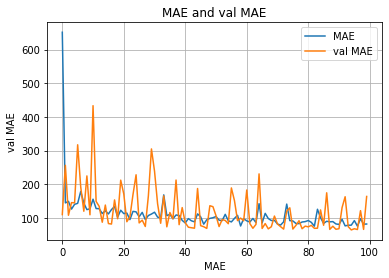

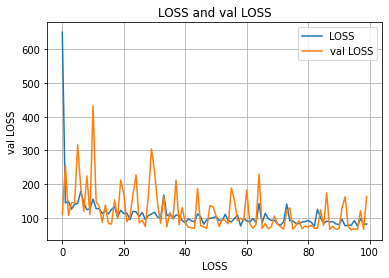

In [16]:
visualize_mae_loss(history_aud_5_layers)

## Evaluating the forecast

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
23/23 [==============================] - 0s 5ms/step
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
114/114 [==============================] - 0s 4ms/step


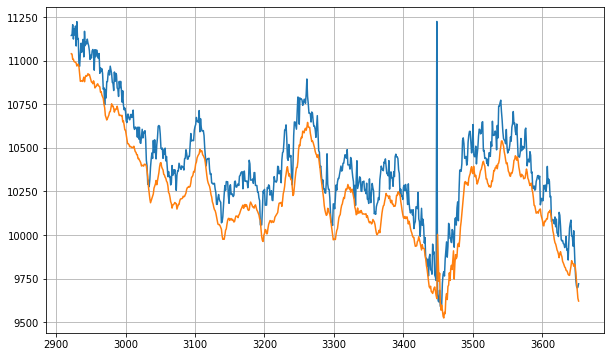

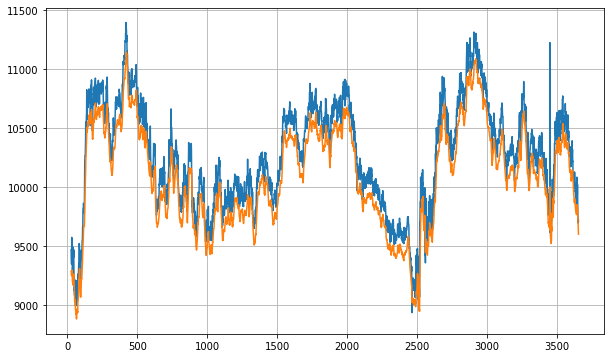

In [17]:
dnn_forecast_aud_model_5_layers = evaluate_forecast(aud_model_5_layers,
                                                    G.aud_times,
                                                    G.aud_series,
                                                    aud_time_valid,
                                                    aud_series_valid,
                                                    G.SPLIT_TIME, -1,
                                                    G.WINDOW_SIZE, 
                                                    G.BATCH_SIZE)

In [18]:
metrics_aud_model_5_layers = compute_metrics(aud_series_valid, dnn_forecast_aud_model_5_layers)
metrics_aud_model_5_layers

{'mae': 356.90042, 'mse': 202716.08, 'rmse': 420.32858, 'mape': 3.403149}

In [19]:
print(f'2 last Actual Price = {aud_series_valid[-2:]}, Predicted Price = {dnn_forecast_aud_model_5_layers[-2:]}')

2 last Actual Price = [[9699.881962]
 [9719.609412]], Predicted Price = [9636.446 9620.56 ]


## Did the same for 2 other currencies

GBP

In [20]:
# Create and test model
gbp_model_5_layers = create_model_5_layers(model_name='GBP')

# Get initial weights
init_weights = gbp_model_5_layers.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
gbp_model_5_layers.set_weights(init_weights)

# Print the model summary
gbp_model_5_layers.summary()

Model: "GBP_model_5_layers"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               7936      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 51,201
Trainable params: 51,201
Non-trainable params: 0
_________________________________________________________________


In [21]:
history_gbp_5_layers = compile_model(gbp_train_set, gbp_model_5_layers, gbp_valid_set)

Epoch 1/100
     79/Unknown - 1s 3ms/step - loss: 774.1208 - mae: 774.6206INFO:tensorflow:Assets written to: fixed_model/2\assets


INFO:tensorflow:Assets written to: fixed_model/2\assets


91/91 [==============================] - 2s 15ms/step - loss: 746.6987 - mae: 747.1985 - val_loss: 281.9750 - val_mae: 282.4748
Epoch 2/100
72/91 [======================>.......] - ETA: 0s - loss: 400.0294 - mae: 400.5294INFO:tensorflow:Assets written to: fixed_model/2\assets


INFO:tensorflow:Assets written to: fixed_model/2\assets


91/91 [==============================] - 1s 14ms/step - loss: 392.3904 - mae: 392.8904 - val_loss: 193.5141 - val_mae: 194.0130
Epoch 3/100
82/91 [==========================>...] - ETA: 0s - loss: 382.4339 - mae: 382.9337INFO:tensorflow:Assets written to: fixed_model/2\assets


INFO:tensorflow:Assets written to: fixed_model/2\assets


91/91 [==============================] - 1s 13ms/step - loss: 382.2578 - mae: 382.7574 - val_loss: 165.7571 - val_mae: 166.2561
Epoch 4/100
91/91 [==============================] - 1s 4ms/step - loss: 316.4317 - mae: 316.9313 - val_loss: 409.9286 - val_mae: 410.4286
Epoch 5/100
91/91 [==============================] - 1s 4ms/step - loss: 311.1219 - mae: 311.6218 - val_loss: 323.4389 - val_mae: 323.9389
Epoch 6/100
85/91 [===========================>..] - ETA: 0s - loss: 309.9415 - mae: 310.4412INFO:tensorflow:Assets written to: fixed_model/2\assets


INFO:tensorflow:Assets written to: fixed_model/2\assets


91/91 [==============================] - 1s 15ms/step - loss: 306.5367 - mae: 307.0365 - val_loss: 140.8154 - val_mae: 141.3134
Epoch 7/100
91/91 [==============================] - 1s 5ms/step - loss: 262.6661 - mae: 263.1657 - val_loss: 204.7586 - val_mae: 205.2584
Epoch 8/100
79/91 [=========================>....] - ETA: 0s - loss: 410.0494 - mae: 410.5493INFO:tensorflow:Assets written to: fixed_model/2\assets


INFO:tensorflow:Assets written to: fixed_model/2\assets


91/91 [==============================] - 1s 13ms/step - loss: 390.6660 - mae: 391.1659 - val_loss: 138.8334 - val_mae: 139.3331
Epoch 9/100
91/91 [==============================] - 1s 5ms/step - loss: 250.0536 - mae: 250.5527 - val_loss: 366.2764 - val_mae: 366.7764
Epoch 10/100
91/91 [==============================] - 1s 5ms/step - loss: 298.7881 - mae: 299.2877 - val_loss: 535.5610 - val_mae: 536.0610
Epoch 11/100
77/91 [========================>.....] - ETA: 0s - loss: 270.9231 - mae: 271.4226INFO:tensorflow:Assets written to: fixed_model/2\assets


INFO:tensorflow:Assets written to: fixed_model/2\assets


91/91 [==============================] - 1s 13ms/step - loss: 260.7270 - mae: 261.2266 - val_loss: 133.0606 - val_mae: 133.5602
Epoch 12/100
91/91 [==============================] - 1s 5ms/step - loss: 275.7835 - mae: 276.2834 - val_loss: 197.1653 - val_mae: 197.6652
Epoch 13/100
81/91 [=========================>....] - ETA: 0s - loss: 252.4612 - mae: 252.9602INFO:tensorflow:Assets written to: fixed_model/2\assets


INFO:tensorflow:Assets written to: fixed_model/2\assets


91/91 [==============================] - 1s 14ms/step - loss: 246.3231 - mae: 246.8221 - val_loss: 119.5350 - val_mae: 120.0345
Epoch 14/100
91/91 [==============================] - 1s 5ms/step - loss: 272.5133 - mae: 273.0132 - val_loss: 371.9793 - val_mae: 372.4793
Epoch 15/100
91/91 [==============================] - 1s 5ms/step - loss: 223.1778 - mae: 223.6773 - val_loss: 173.3756 - val_mae: 173.8756
Epoch 16/100
91/91 [==============================] - 1s 5ms/step - loss: 326.4626 - mae: 326.9622 - val_loss: 557.8156 - val_mae: 558.3156
Epoch 17/100
91/91 [==============================] - 1s 4ms/step - loss: 249.5271 - mae: 250.0267 - val_loss: 156.9117 - val_mae: 157.4117
Epoch 18/100
91/91 [==============================] - 1s 5ms/step - loss: 247.7249 - mae: 248.2246 - val_loss: 493.9214 - val_mae: 494.4214
Epoch 19/100
91/91 [==============================] - 1s 5ms/step - loss: 249.8744 - mae: 250.3741 - val_loss: 283.9016 - val_mae: 284.4016
Epoch 20/100
91/91 [============

INFO:tensorflow:Assets written to: fixed_model/2\assets


91/91 [==============================] - 1s 13ms/step - loss: 192.1650 - mae: 192.6641 - val_loss: 111.4514 - val_mae: 111.9501
Epoch 24/100
91/91 [==============================] - 1s 5ms/step - loss: 242.6334 - mae: 243.1327 - val_loss: 277.3219 - val_mae: 277.8219
Epoch 25/100
91/91 [==============================] - 1s 4ms/step - loss: 347.8697 - mae: 348.3691 - val_loss: 214.0354 - val_mae: 214.5354
Epoch 26/100
91/91 [==============================] - 1s 4ms/step - loss: 227.9940 - mae: 228.4934 - val_loss: 150.9715 - val_mae: 151.4702
Epoch 27/100
91/91 [==============================] - 1s 5ms/step - loss: 191.9092 - mae: 192.4088 - val_loss: 409.9054 - val_mae: 410.4054
Epoch 28/100
91/91 [==============================] - 1s 5ms/step - loss: 282.2472 - mae: 282.7468 - val_loss: 643.4482 - val_mae: 643.9482
Epoch 29/100
91/91 [==============================] - 1s 5ms/step - loss: 222.6187 - mae: 223.1184 - val_loss: 142.8966 - val_mae: 143.3949
Epoch 30/100
91/91 [============

INFO:tensorflow:Assets written to: fixed_model/2\assets


91/91 [==============================] - 1s 13ms/step - loss: 216.9174 - mae: 217.4169 - val_loss: 107.6234 - val_mae: 108.1229
Epoch 38/100
91/91 [==============================] - 1s 5ms/step - loss: 209.5362 - mae: 210.0355 - val_loss: 509.8157 - val_mae: 510.3157
Epoch 39/100
91/91 [==============================] - 1s 5ms/step - loss: 255.0165 - mae: 255.5161 - val_loss: 112.0587 - val_mae: 112.5581
Epoch 40/100
91/91 [==============================] - 1s 5ms/step - loss: 178.3886 - mae: 178.8879 - val_loss: 172.6826 - val_mae: 173.1820
Epoch 41/100
91/91 [==============================] - 1s 5ms/step - loss: 194.9081 - mae: 195.4073 - val_loss: 185.1060 - val_mae: 185.6060
Epoch 42/100
91/91 [==============================] - 1s 5ms/step - loss: 208.4550 - mae: 208.9543 - val_loss: 150.0332 - val_mae: 150.5320
Epoch 43/100
91/91 [==============================] - 1s 5ms/step - loss: 209.5956 - mae: 210.0953 - val_loss: 281.3975 - val_mae: 281.8975
Epoch 44/100
91/91 [============

INFO:tensorflow:Assets written to: fixed_model/2\assets


91/91 [==============================] - 1s 14ms/step - loss: 159.7821 - mae: 160.2819 - val_loss: 99.8128 - val_mae: 100.3124
Epoch 49/100
91/91 [==============================] - 1s 5ms/step - loss: 215.9581 - mae: 216.4577 - val_loss: 136.6138 - val_mae: 137.1134
Epoch 50/100
91/91 [==============================] - 1s 5ms/step - loss: 182.6320 - mae: 183.1313 - val_loss: 243.7464 - val_mae: 244.2464
Epoch 51/100
91/91 [==============================] - 1s 5ms/step - loss: 226.6000 - mae: 227.0994 - val_loss: 170.3718 - val_mae: 170.8718
Epoch 52/100
91/91 [==============================] - 1s 5ms/step - loss: 189.0298 - mae: 189.5292 - val_loss: 209.0625 - val_mae: 209.5623
Epoch 53/100
91/91 [==============================] - 1s 5ms/step - loss: 153.9984 - mae: 154.4982 - val_loss: 299.2725 - val_mae: 299.7725
Epoch 54/100
91/91 [==============================] - 1s 5ms/step - loss: 164.0751 - mae: 164.5743 - val_loss: 133.3161 - val_mae: 133.8152
Epoch 55/100
91/91 [=============

INFO:tensorflow:Assets written to: fixed_model/2\assets


91/91 [==============================] - 1s 14ms/step - loss: 249.8347 - mae: 250.3346 - val_loss: 96.3877 - val_mae: 96.8869
Epoch 73/100
91/91 [==============================] - 1s 5ms/step - loss: 149.3661 - mae: 149.8653 - val_loss: 110.6293 - val_mae: 111.1289
Epoch 74/100
76/91 [========================>.....] - ETA: 0s - loss: 160.8298 - mae: 161.3293INFO:tensorflow:Assets written to: fixed_model/2\assets


INFO:tensorflow:Assets written to: fixed_model/2\assets


91/91 [==============================] - 2s 16ms/step - loss: 158.3012 - mae: 158.8005 - val_loss: 94.6559 - val_mae: 95.1550
Epoch 75/100
91/91 [==============================] - 1s 5ms/step - loss: 161.8524 - mae: 162.3517 - val_loss: 257.7462 - val_mae: 258.2458
Epoch 76/100
91/91 [==============================] - 1s 5ms/step - loss: 163.8590 - mae: 164.3584 - val_loss: 173.2992 - val_mae: 173.7987
Epoch 77/100
91/91 [==============================] - 1s 5ms/step - loss: 191.2107 - mae: 191.7099 - val_loss: 100.4643 - val_mae: 100.9636
Epoch 78/100
91/91 [==============================] - 1s 5ms/step - loss: 169.8302 - mae: 170.3291 - val_loss: 183.1982 - val_mae: 183.6974
Epoch 79/100
91/91 [==============================] - 1s 6ms/step - loss: 218.6111 - mae: 219.1107 - val_loss: 194.8293 - val_mae: 195.3289
Epoch 80/100
91/91 [==============================] - 1s 5ms/step - loss: 172.8098 - mae: 173.3096 - val_loss: 277.7085 - val_mae: 278.2085
Epoch 81/100
91/91 [==============

INFO:tensorflow:Assets written to: fixed_model/2\assets


91/91 [==============================] - 1s 13ms/step - loss: 167.1477 - mae: 167.6472 - val_loss: 93.6704 - val_mae: 94.1693
Epoch 86/100
91/91 [==============================] - 1s 5ms/step - loss: 157.3656 - mae: 157.8648 - val_loss: 151.2610 - val_mae: 151.7605
Epoch 87/100
91/91 [==============================] - 1s 5ms/step - loss: 175.1421 - mae: 175.6417 - val_loss: 237.2817 - val_mae: 237.7817
Epoch 88/100
91/91 [==============================] - 1s 5ms/step - loss: 194.5842 - mae: 195.0837 - val_loss: 179.1635 - val_mae: 179.6631
Epoch 89/100
91/91 [==============================] - 1s 5ms/step - loss: 158.0293 - mae: 158.5287 - val_loss: 132.9331 - val_mae: 133.4315
Epoch 90/100
91/91 [==============================] - 1s 5ms/step - loss: 208.9762 - mae: 209.4759 - val_loss: 285.0062 - val_mae: 285.5062
Epoch 91/100
91/91 [==============================] - 1s 5ms/step - loss: 182.0210 - mae: 182.5208 - val_loss: 242.8540 - val_mae: 243.3540
Epoch 92/100
91/91 [==============

INFO:tensorflow:Assets written to: fixed_model/2\assets


91/91 [==============================] - 1s 13ms/step - loss: 164.7919 - mae: 165.2914 - val_loss: 93.3702 - val_mae: 93.8698
Epoch 94/100
91/91 [==============================] - 1s 5ms/step - loss: 142.7820 - mae: 143.2810 - val_loss: 224.1938 - val_mae: 224.6938
Epoch 95/100
71/91 [======================>.......] - ETA: 0s - loss: 178.2195 - mae: 178.7187INFO:tensorflow:Assets written to: fixed_model/2\assets


INFO:tensorflow:Assets written to: fixed_model/2\assets


91/91 [==============================] - 1s 13ms/step - loss: 187.9798 - mae: 188.4791 - val_loss: 92.7484 - val_mae: 93.2472
Epoch 96/100
91/91 [==============================] - 1s 5ms/step - loss: 165.0663 - mae: 165.5658 - val_loss: 103.6914 - val_mae: 104.1913
Epoch 97/100
91/91 [==============================] - 1s 5ms/step - loss: 204.1440 - mae: 204.6438 - val_loss: 311.8809 - val_mae: 312.3806
Epoch 98/100
91/91 [==============================] - 1s 5ms/step - loss: 156.1649 - mae: 156.6641 - val_loss: 170.4454 - val_mae: 170.9442
Epoch 99/100
91/91 [==============================] - 1s 5ms/step - loss: 166.4800 - mae: 166.9793 - val_loss: 94.2085 - val_mae: 94.7066
Epoch 100/100
91/91 [==============================] - 1s 5ms/step - loss: 159.1833 - mae: 159.6826 - val_loss: 99.5970 - val_mae: 100.0965


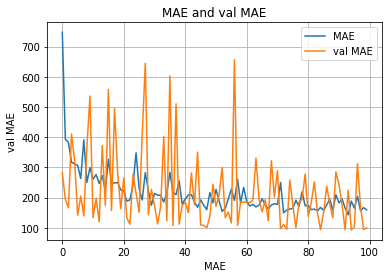

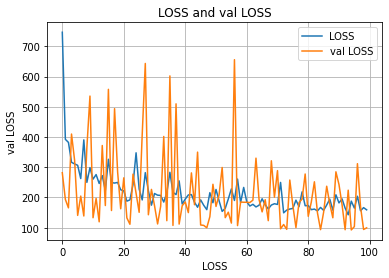

In [22]:
visualize_mae_loss(history_gbp_5_layers)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
23/23 [==============================] - 0s 4ms/step
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
114/114 [==============================] - 0s 4ms/step


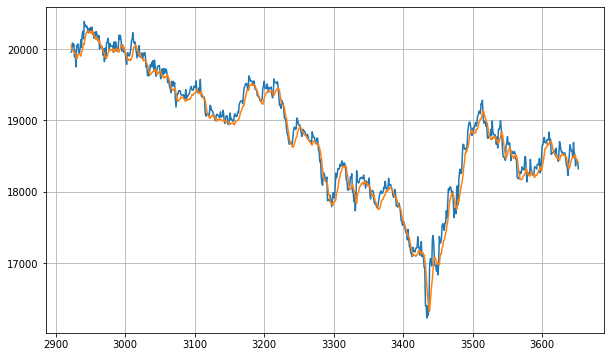

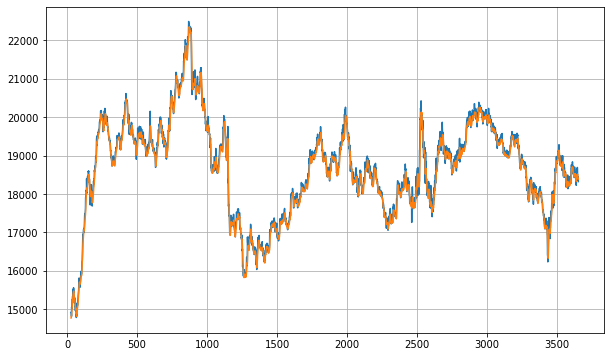

In [23]:
dnn_forecast_gbp_model_5_layers = evaluate_forecast(gbp_model_5_layers, 
                                                    G.gbp_times, 
                                                    G.gbp_series, 
                                                    gbp_time_valid, 
                                                    gbp_series_valid,
                                                    G.SPLIT_TIME, -1, 
                                                    G.WINDOW_SIZE, 
                                                    G.BATCH_SIZE)

In [24]:
metrics_gbp_model_5_layers = compute_metrics(gbp_series_valid, dnn_forecast_gbp_model_5_layers)
metrics_gbp_model_5_layers

{'mae': 964.6491, 'mse': 1438102.6, 'rmse': 1155.4294, 'mape': 5.154333}

In [25]:
print(f'2 last Actual Price = {gbp_series_valid[-2:]}, Predicted Price = {dnn_forecast_gbp_model_5_layers[-2:]}')

2 last Actual Price = [[18421.208189]
 [18322.202251]], Predicted Price = [18420.002 18412.527]


SGD

In [26]:
# Create and test model
sgd_model_5_layers = create_model_5_layers(model_name='SGD')

# Get initial weights
init_weights = sgd_model_5_layers.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
sgd_model_5_layers.set_weights(init_weights)

# Print the model summary
sgd_model_5_layers.summary()

Model: "SGD_model_5_layers"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               7936      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 51,201
Trainable params: 51,201
Non-trainable params: 0
_________________________________________________________________


In [27]:
history_sgd_5_layers = compile_model(sgd_train_set, sgd_model_5_layers, sgd_valid_set)

Epoch 1/100
     73/Unknown - 1s 4ms/step - loss: 694.5833 - mae: 695.0831INFO:tensorflow:Assets written to: fixed_model/3\assets


INFO:tensorflow:Assets written to: fixed_model/3\assets


91/91 [==============================] - 2s 15ms/step - loss: 591.2075 - mae: 591.7073 - val_loss: 96.2331 - val_mae: 96.7317
Epoch 2/100
91/91 [==============================] - 1s 5ms/step - loss: 140.4099 - mae: 140.9080 - val_loss: 210.5731 - val_mae: 211.0731
Epoch 3/100
91/91 [==============================] - 1s 5ms/step - loss: 176.1301 - mae: 176.6297 - val_loss: 239.2187 - val_mae: 239.7187
Epoch 4/100
91/91 [==============================] - 1s 5ms/step - loss: 144.6382 - mae: 145.1375 - val_loss: 335.2657 - val_mae: 335.7657
Epoch 5/100
91/91 [==============================] - 1s 5ms/step - loss: 135.9085 - mae: 136.4081 - val_loss: 184.5288 - val_mae: 185.0288
Epoch 6/100
91/91 [==============================] - 1s 5ms/step - loss: 161.2100 - mae: 161.7097 - val_loss: 150.0638 - val_mae: 150.5636
Epoch 7/100
81/91 [=========================>....] - ETA: 0s - loss: 117.9755 - mae: 118.4742INFO:tensorflow:Assets written to: fixed_model/3\assets


INFO:tensorflow:Assets written to: fixed_model/3\assets


91/91 [==============================] - 1s 15ms/step - loss: 124.4639 - mae: 124.9627 - val_loss: 87.1322 - val_mae: 87.6308
Epoch 8/100
91/91 [==============================] - 1s 4ms/step - loss: 139.6149 - mae: 140.1141 - val_loss: 165.2575 - val_mae: 165.7575
Epoch 9/100
84/91 [==========================>...] - ETA: 0s - loss: 117.5517 - mae: 118.0510INFO:tensorflow:Assets written to: fixed_model/3\assets


INFO:tensorflow:Assets written to: fixed_model/3\assets


91/91 [==============================] - 1s 13ms/step - loss: 115.3771 - mae: 115.8764 - val_loss: 55.6832 - val_mae: 56.1819
Epoch 10/100
91/91 [==============================] - 1s 4ms/step - loss: 113.4288 - mae: 113.9281 - val_loss: 214.7461 - val_mae: 215.2461
Epoch 11/100
91/91 [==============================] - 1s 5ms/step - loss: 101.6624 - mae: 102.1618 - val_loss: 229.1256 - val_mae: 229.6256
Epoch 12/100
81/91 [=========================>....] - ETA: 0s - loss: 119.3019 - mae: 119.8011INFO:tensorflow:Assets written to: fixed_model/3\assets


INFO:tensorflow:Assets written to: fixed_model/3\assets


91/91 [==============================] - 1s 13ms/step - loss: 115.7199 - mae: 116.2192 - val_loss: 52.4451 - val_mae: 52.9416
Epoch 13/100
91/91 [==============================] - 1s 5ms/step - loss: 160.1527 - mae: 160.6515 - val_loss: 118.6948 - val_mae: 119.1947
Epoch 14/100
91/91 [==============================] - 1s 5ms/step - loss: 135.0809 - mae: 135.5802 - val_loss: 84.7224 - val_mae: 85.2204
Epoch 15/100
91/91 [==============================] - 1s 5ms/step - loss: 193.5620 - mae: 194.0618 - val_loss: 60.6635 - val_mae: 61.1601
Epoch 16/100
91/91 [==============================] - 1s 5ms/step - loss: 92.5833 - mae: 93.0823 - val_loss: 113.3516 - val_mae: 113.8505
Epoch 17/100
91/91 [==============================] - 1s 4ms/step - loss: 148.5406 - mae: 149.0401 - val_loss: 84.9716 - val_mae: 85.4710
Epoch 18/100
91/91 [==============================] - 1s 5ms/step - loss: 102.0192 - mae: 102.5183 - val_loss: 58.7301 - val_mae: 59.2285
Epoch 19/100
91/91 [========================

INFO:tensorflow:Assets written to: fixed_model/3\assets


91/91 [==============================] - 1s 12ms/step - loss: 128.6349 - mae: 129.1335 - val_loss: 43.9579 - val_mae: 44.4559
Epoch 36/100
91/91 [==============================] - 1s 5ms/step - loss: 78.5120 - mae: 79.0101 - val_loss: 98.5184 - val_mae: 99.0172
Epoch 37/100
91/91 [==============================] - 1s 5ms/step - loss: 96.7205 - mae: 97.2194 - val_loss: 158.9050 - val_mae: 159.4050
Epoch 38/100
91/91 [==============================] - 1s 5ms/step - loss: 92.2294 - mae: 92.7282 - val_loss: 72.9621 - val_mae: 73.4609
Epoch 39/100
91/91 [==============================] - 1s 5ms/step - loss: 96.9365 - mae: 97.4356 - val_loss: 96.8795 - val_mae: 97.3793
Epoch 40/100
91/91 [==============================] - 1s 5ms/step - loss: 101.2113 - mae: 101.7108 - val_loss: 285.0308 - val_mae: 285.5308
Epoch 41/100
91/91 [==============================] - 1s 4ms/step - loss: 104.0404 - mae: 104.5394 - val_loss: 49.7662 - val_mae: 50.2637
Epoch 42/100
83/91 [==========================>...

INFO:tensorflow:Assets written to: fixed_model/3\assets


91/91 [==============================] - 1s 13ms/step - loss: 82.6038 - mae: 83.1025 - val_loss: 43.8689 - val_mae: 44.3657
Epoch 43/100
91/91 [==============================] - 1s 5ms/step - loss: 87.0032 - mae: 87.5023 - val_loss: 87.2984 - val_mae: 87.7982
Epoch 44/100
91/91 [==============================] - 1s 5ms/step - loss: 122.6604 - mae: 123.1597 - val_loss: 125.0687 - val_mae: 125.5687
Epoch 45/100
91/91 [==============================] - 1s 4ms/step - loss: 83.1304 - mae: 83.6290 - val_loss: 214.7678 - val_mae: 215.2678
Epoch 46/100
91/91 [==============================] - 1s 5ms/step - loss: 89.3513 - mae: 89.8505 - val_loss: 48.8550 - val_mae: 49.3502
Epoch 47/100
91/91 [==============================] - 1s 5ms/step - loss: 84.8686 - mae: 85.3671 - val_loss: 127.8541 - val_mae: 128.3539
Epoch 48/100
91/91 [==============================] - 1s 5ms/step - loss: 87.9870 - mae: 88.4864 - val_loss: 87.8914 - val_mae: 88.3910
Epoch 49/100
91/91 [==============================] 

INFO:tensorflow:Assets written to: fixed_model/3\assets


91/91 [==============================] - 1s 14ms/step - loss: 83.6669 - mae: 84.1657 - val_loss: 40.8351 - val_mae: 41.3304
Epoch 65/100
81/91 [=========================>....] - ETA: 0s - loss: 78.4491 - mae: 78.9479INFO:tensorflow:Assets written to: fixed_model/3\assets


INFO:tensorflow:Assets written to: fixed_model/3\assets


91/91 [==============================] - 1s 13ms/step - loss: 76.4868 - mae: 76.9857 - val_loss: 39.8378 - val_mae: 40.3371
Epoch 66/100
91/91 [==============================] - 1s 5ms/step - loss: 123.4113 - mae: 123.9104 - val_loss: 80.5598 - val_mae: 81.0586
Epoch 67/100
91/91 [==============================] - 1s 5ms/step - loss: 75.5520 - mae: 76.0510 - val_loss: 301.3334 - val_mae: 301.8334
Epoch 68/100
91/91 [==============================] - 1s 5ms/step - loss: 160.7541 - mae: 161.2541 - val_loss: 204.5370 - val_mae: 205.0370
Epoch 69/100
91/91 [==============================] - 1s 4ms/step - loss: 68.6379 - mae: 69.1358 - val_loss: 42.9314 - val_mae: 43.4288
Epoch 70/100
91/91 [==============================] - 1s 5ms/step - loss: 73.9422 - mae: 74.4408 - val_loss: 47.0405 - val_mae: 47.5392
Epoch 71/100
82/91 [==========================>...] - ETA: 0s - loss: 106.7555 - mae: 107.2548INFO:tensorflow:Assets written to: fixed_model/3\assets


INFO:tensorflow:Assets written to: fixed_model/3\assets


91/91 [==============================] - 1s 15ms/step - loss: 106.4409 - mae: 106.9402 - val_loss: 38.9247 - val_mae: 39.4216
Epoch 72/100
91/91 [==============================] - 1s 4ms/step - loss: 69.3766 - mae: 69.8752 - val_loss: 76.6225 - val_mae: 77.1215
Epoch 73/100
91/91 [==============================] - 1s 5ms/step - loss: 79.7317 - mae: 80.2304 - val_loss: 77.1669 - val_mae: 77.6665
Epoch 74/100
91/91 [==============================] - 1s 5ms/step - loss: 122.0189 - mae: 122.5180 - val_loss: 94.9641 - val_mae: 95.4634
Epoch 75/100
91/91 [==============================] - 1s 4ms/step - loss: 81.7777 - mae: 82.2765 - val_loss: 50.7764 - val_mae: 51.2744
Epoch 76/100
91/91 [==============================] - 1s 5ms/step - loss: 77.6791 - mae: 78.1777 - val_loss: 90.7328 - val_mae: 91.2327
Epoch 77/100
91/91 [==============================] - 1s 5ms/step - loss: 72.7294 - mae: 73.2279 - val_loss: 102.9851 - val_mae: 103.4844
Epoch 78/100
91/91 [==============================] - 

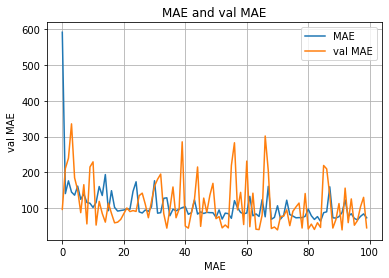

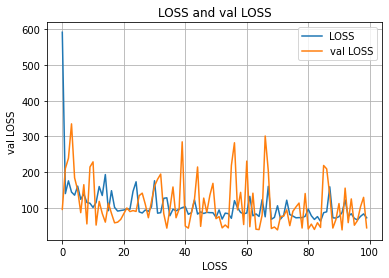

In [28]:
visualize_mae_loss(history_sgd_5_layers)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
23/23 [==============================] - 0s 4ms/step
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
114/114 [==============================] - 0s 4ms/step


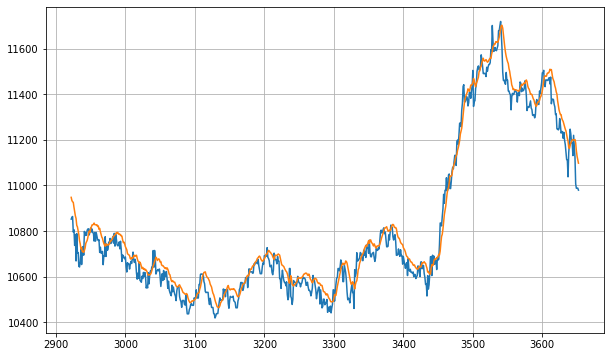

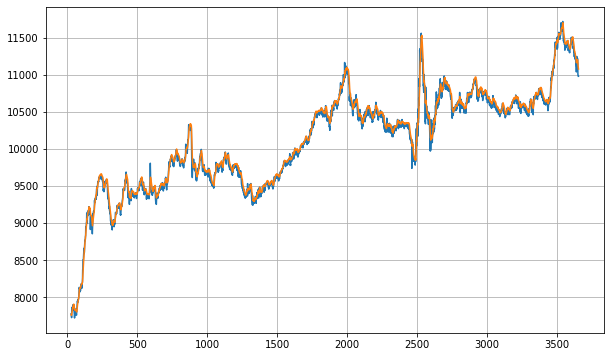

In [29]:
dnn_forecast_sgd_model_5_layers = evaluate_forecast(sgd_model_5_layers, 
                                                    G.sgd_times, 
                                                    G.sgd_series, 
                                                    sgd_time_valid, 
                                                    sgd_series_valid,
                                                    G.SPLIT_TIME, -1,  
                                                    G.WINDOW_SIZE, 
                                                    G.BATCH_SIZE)

In [30]:
metrics_sgd_model_5_layers = compute_metrics(sgd_series_valid, dnn_forecast_sgd_model_5_layers)
metrics_sgd_model_5_layers

{'mae': 361.33148, 'mse': 240122.14, 'rmse': 474.8495, 'mape': 3.3089995}

In [31]:
print(f'2 last Actual Price = {sgd_series_valid[-2:]}, Predicted Price = {dnn_forecast_sgd_model_5_layers[-2:]}')

2 last Actual Price = [[10987.942405]
 [10979.160369]], Predicted Price = [11113.321 11097.38 ]


## Defining the model architecture

Using 4 layers model with regularizers

In [32]:
def create_model_regularized_4_layers(model_name):
    
    # Build the model
    model = tf.keras.models.Sequential([
        
        tf.keras.layers.Dense(128, input_shape=[G.WINDOW_SIZE], activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        tf.keras.layers.Dense(1)

    ], name=f"{model_name}_model_regularized_4_layers")

    return model

In [33]:
# Create and test model
aud_model_4_layers_regularized = create_model_regularized_4_layers(model_name='AUD')

# Get initial weights
init_weights = aud_model_4_layers_regularized.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
aud_model_4_layers_regularized.set_weights(init_weights)

# Print the model summary
aud_model_4_layers_regularized.summary()

Model: "AUD_model_regularized_4_layers"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 14,337
Trainable params: 14,337
Non-trainable params: 0
_________________________________________________________________


## Compiling the model

In [34]:
# Run the training with dynamic LR
history_aud_4_layers_regularized = compile_model(aud_train_set, aud_model_4_layers_regularized, aud_valid_set)

Epoch 1/100
     85/Unknown - 1s 3ms/step - loss: 783.3359 - mae: 782.6058  INFO:tensorflow:Assets written to: fixed_model/4\assets


INFO:tensorflow:Assets written to: fixed_model/4\assets


91/91 [==============================] - 2s 16ms/step - loss: 746.7433 - mae: 746.0347 - val_loss: 150.8133 - val_mae: 150.4642
Epoch 2/100
91/91 [==============================] - 1s 5ms/step - loss: 138.0795 - mae: 137.8549 - val_loss: 151.6248 - val_mae: 151.4759
Epoch 3/100
80/91 [=========================>....] - ETA: 0s - loss: 146.8993 - mae: 146.7721INFO:tensorflow:Assets written to: fixed_model/4\assets


INFO:tensorflow:Assets written to: fixed_model/4\assets


91/91 [==============================] - 1s 13ms/step - loss: 144.5262 - mae: 144.4007 - val_loss: 110.9907 - val_mae: 110.8791
Epoch 4/100
82/91 [==========================>...] - ETA: 0s - loss: 127.7551 - mae: 127.6465INFO:tensorflow:Assets written to: fixed_model/4\assets


INFO:tensorflow:Assets written to: fixed_model/4\assets


91/91 [==============================] - 1s 13ms/step - loss: 127.5465 - mae: 127.4383 - val_loss: 105.3190 - val_mae: 105.2129
Epoch 5/100
91/91 [==============================] - 1s 5ms/step - loss: 126.8421 - mae: 126.7375 - val_loss: 146.4455 - val_mae: 146.3424
Epoch 6/100
84/91 [==========================>...] - ETA: 0s - loss: 117.0894 - mae: 116.9855INFO:tensorflow:Assets written to: fixed_model/4\assets


INFO:tensorflow:Assets written to: fixed_model/4\assets


91/91 [==============================] - 1s 14ms/step - loss: 116.2866 - mae: 116.1828 - val_loss: 99.0103 - val_mae: 98.9064
Epoch 7/100
81/91 [=========================>....] - ETA: 0s - loss: 129.4358 - mae: 129.3317INFO:tensorflow:Assets written to: fixed_model/4\assets


INFO:tensorflow:Assets written to: fixed_model/4\assets


91/91 [==============================] - 1s 13ms/step - loss: 128.2999 - mae: 128.1958 - val_loss: 93.8033 - val_mae: 93.6988
Epoch 8/100
91/91 [==============================] - 1s 4ms/step - loss: 114.8460 - mae: 114.7425 - val_loss: 129.2286 - val_mae: 129.1264
Epoch 9/100
91/91 [==============================] - 1s 5ms/step - loss: 117.5586 - mae: 117.4563 - val_loss: 104.3577 - val_mae: 104.2564
Epoch 10/100
91/91 [==============================] - 1s 4ms/step - loss: 110.3322 - mae: 110.2300 - val_loss: 97.6658 - val_mae: 97.5635
Epoch 11/100
91/91 [==============================] - 1s 4ms/step - loss: 114.0948 - mae: 113.9936 - val_loss: 97.3586 - val_mae: 97.2567
Epoch 12/100
91/91 [==============================] - 1s 4ms/step - loss: 124.4259 - mae: 124.3247 - val_loss: 130.3102 - val_mae: 130.2081
Epoch 13/100
91/91 [==============================] - 1s 4ms/step - loss: 122.5072 - mae: 122.4028 - val_loss: 97.9996 - val_mae: 97.8942
Epoch 14/100
91/91 [======================

INFO:tensorflow:Assets written to: fixed_model/4\assets


91/91 [==============================] - 2s 16ms/step - loss: 94.1192 - mae: 94.0105 - val_loss: 80.6119 - val_mae: 80.5020
Epoch 16/100
91/91 [==============================] - 1s 4ms/step - loss: 118.4500 - mae: 118.3401 - val_loss: 94.0462 - val_mae: 93.9365
Epoch 17/100
91/91 [==============================] - 1s 5ms/step - loss: 113.3611 - mae: 113.2515 - val_loss: 82.6220 - val_mae: 82.5122
Epoch 18/100
91/91 [==============================] - 1s 5ms/step - loss: 91.0319 - mae: 90.9231 - val_loss: 88.1419 - val_mae: 88.0337
Epoch 19/100
91/91 [==============================] - 1s 5ms/step - loss: 116.1047 - mae: 115.9971 - val_loss: 122.5733 - val_mae: 122.4660
Epoch 20/100
91/91 [==============================] - 1s 4ms/step - loss: 130.9459 - mae: 130.8394 - val_loss: 114.9349 - val_mae: 114.8291
Epoch 21/100
87/91 [===========================>..] - ETA: 0s - loss: 107.3652 - mae: 107.2590INFO:tensorflow:Assets written to: fixed_model/4\assets


INFO:tensorflow:Assets written to: fixed_model/4\assets


91/91 [==============================] - 1s 13ms/step - loss: 106.6865 - mae: 106.5803 - val_loss: 78.2602 - val_mae: 78.1540
Epoch 22/100
91/91 [==============================] - 1s 5ms/step - loss: 104.7408 - mae: 104.6350 - val_loss: 92.0931 - val_mae: 91.9874
Epoch 23/100
91/91 [==============================] - 1s 4ms/step - loss: 106.7464 - mae: 106.6415 - val_loss: 116.7449 - val_mae: 116.6400
Epoch 24/100
91/91 [==============================] - 1s 4ms/step - loss: 99.9274 - mae: 99.8229 - val_loss: 177.5463 - val_mae: 177.4432
Epoch 25/100
87/91 [===========================>..] - ETA: 0s - loss: 85.8288 - mae: 85.7250INFO:tensorflow:Assets written to: fixed_model/4\assets


INFO:tensorflow:Assets written to: fixed_model/4\assets


91/91 [==============================] - 1s 13ms/step - loss: 85.4961 - mae: 85.3923 - val_loss: 75.1730 - val_mae: 75.0699
Epoch 26/100
85/91 [===========================>..] - ETA: 0s - loss: 91.1043 - mae: 91.0017INFO:tensorflow:Assets written to: fixed_model/4\assets


INFO:tensorflow:Assets written to: fixed_model/4\assets


91/91 [==============================] - 1s 13ms/step - loss: 90.8819 - mae: 90.7795 - val_loss: 74.4268 - val_mae: 74.3242
Epoch 27/100
91/91 [==============================] - 1s 4ms/step - loss: 102.4795 - mae: 102.3780 - val_loss: 77.6441 - val_mae: 77.5429
Epoch 28/100
91/91 [==============================] - 1s 4ms/step - loss: 93.8222 - mae: 93.7215 - val_loss: 85.5634 - val_mae: 85.4621
Epoch 29/100
91/91 [==============================] - 1s 4ms/step - loss: 91.6834 - mae: 91.5836 - val_loss: 80.7703 - val_mae: 80.6698
Epoch 30/100
91/91 [==============================] - ETA: 0s - loss: 85.0698 - mae: 84.9712INFO:tensorflow:Assets written to: fixed_model/4\assets


INFO:tensorflow:Assets written to: fixed_model/4\assets


91/91 [==============================] - 1s 13ms/step - loss: 85.0698 - mae: 84.9712 - val_loss: 73.3178 - val_mae: 73.2187
Epoch 31/100
91/91 [==============================] - 1s 4ms/step - loss: 85.3319 - mae: 85.2344 - val_loss: 159.3017 - val_mae: 159.2046
Epoch 32/100
91/91 [==============================] - 0s 4ms/step - loss: 96.8461 - mae: 96.7494 - val_loss: 95.1043 - val_mae: 95.0063
Epoch 33/100
91/91 [==============================] - 1s 4ms/step - loss: 87.2571 - mae: 87.1610 - val_loss: 155.0769 - val_mae: 154.9825
Epoch 34/100
91/91 [==============================] - 1s 4ms/step - loss: 110.9788 - mae: 110.8837 - val_loss: 84.1922 - val_mae: 84.0991
Epoch 35/100
91/91 [==============================] - 1s 4ms/step - loss: 92.1375 - mae: 92.0436 - val_loss: 89.0132 - val_mae: 88.9193
Epoch 36/100
91/91 [==============================] - 1s 5ms/step - loss: 83.2511 - mae: 83.1586 - val_loss: 130.9758 - val_mae: 130.8838
Epoch 37/100
91/91 [==============================] 

INFO:tensorflow:Assets written to: fixed_model/4\assets


91/91 [==============================] - 1s 13ms/step - loss: 89.4375 - mae: 89.3481 - val_loss: 70.5478 - val_mae: 70.4598
Epoch 40/100
91/91 [==============================] - 1s 4ms/step - loss: 104.0916 - mae: 104.0040 - val_loss: 104.2087 - val_mae: 104.1200
Epoch 41/100
91/91 [==============================] - 1s 4ms/step - loss: 94.6980 - mae: 94.6109 - val_loss: 83.2743 - val_mae: 83.1875
Epoch 42/100
91/91 [==============================] - 1s 4ms/step - loss: 85.6085 - mae: 85.5224 - val_loss: 81.4771 - val_mae: 81.3907
Epoch 43/100
91/91 [==============================] - 1s 4ms/step - loss: 96.4893 - mae: 96.4039 - val_loss: 97.6688 - val_mae: 97.5851
Epoch 44/100
91/91 [==============================] - 1s 4ms/step - loss: 82.8005 - mae: 82.7170 - val_loss: 71.1667 - val_mae: 71.0822
Epoch 45/100
91/91 [==============================] - 1s 5ms/step - loss: 81.8421 - mae: 81.7594 - val_loss: 79.2794 - val_mae: 79.1971
Epoch 46/100
91/91 [==============================] - 1s

INFO:tensorflow:Assets written to: fixed_model/4\assets


91/91 [==============================] - 1s 13ms/step - loss: 80.2489 - mae: 80.1767 - val_loss: 68.5688 - val_mae: 68.4976
Epoch 55/100
91/91 [==============================] - 1s 4ms/step - loss: 70.2852 - mae: 70.2137 - val_loss: 69.4343 - val_mae: 69.3647
Epoch 56/100
91/91 [==============================] - 1s 4ms/step - loss: 103.3829 - mae: 103.3139 - val_loss: 71.2166 - val_mae: 71.1472
Epoch 57/100
91/91 [==============================] - 1s 4ms/step - loss: 86.4491 - mae: 86.3819 - val_loss: 89.2866 - val_mae: 89.2181
Epoch 58/100
91/91 [==============================] - 1s 4ms/step - loss: 97.0393 - mae: 96.9737 - val_loss: 75.5206 - val_mae: 75.4544
Epoch 59/100
91/91 [==============================] - 1s 4ms/step - loss: 73.7620 - mae: 73.6970 - val_loss: 72.0428 - val_mae: 71.9793
Epoch 60/100
91/91 [==============================] - 1s 4ms/step - loss: 99.7259 - mae: 99.6624 - val_loss: 126.7760 - val_mae: 126.7146
Epoch 61/100
91/91 [==============================] - 1s

INFO:tensorflow:Assets written to: fixed_model/4\assets


91/91 [==============================] - 1s 13ms/step - loss: 99.3041 - mae: 99.2618 - val_loss: 67.1911 - val_mae: 67.1489
Epoch 75/100
91/91 [==============================] - 1s 5ms/step - loss: 77.1798 - mae: 77.1393 - val_loss: 150.3337 - val_mae: 150.2956
Epoch 76/100
84/91 [==========================>...] - ETA: 0s - loss: 78.7973 - mae: 78.7588INFO:tensorflow:Assets written to: fixed_model/4\assets


INFO:tensorflow:Assets written to: fixed_model/4\assets


91/91 [==============================] - 2s 15ms/step - loss: 79.6484 - mae: 79.6100 - val_loss: 66.7399 - val_mae: 66.7028
Epoch 77/100
91/91 [==============================] - 1s 4ms/step - loss: 77.7246 - mae: 77.6881 - val_loss: 73.2968 - val_mae: 73.2603
Epoch 78/100
91/91 [==============================] - 1s 4ms/step - loss: 75.0903 - mae: 75.0555 - val_loss: 68.8877 - val_mae: 68.8529
Epoch 79/100
91/91 [==============================] - 1s 4ms/step - loss: 73.0675 - mae: 73.0343 - val_loss: 79.5628 - val_mae: 79.5285
Epoch 80/100
91/91 [==============================] - 1s 5ms/step - loss: 85.8896 - mae: 85.8585 - val_loss: 88.8040 - val_mae: 88.7738
Epoch 81/100
91/91 [==============================] - 1s 5ms/step - loss: 74.1258 - mae: 74.0964 - val_loss: 93.5009 - val_mae: 93.4724
Epoch 82/100
91/91 [==============================] - 1s 4ms/step - loss: 76.7153 - mae: 76.6874 - val_loss: 84.9535 - val_mae: 84.9272
Epoch 83/100
91/91 [==============================] - 1s 4ms

INFO:tensorflow:Assets written to: fixed_model/4\assets


91/91 [==============================] - 1s 13ms/step - loss: 74.0925 - mae: 74.0698 - val_loss: 65.1862 - val_mae: 65.1652
Epoch 86/100
91/91 [==============================] - 1s 4ms/step - loss: 95.3344 - mae: 95.3147 - val_loss: 110.2484 - val_mae: 110.2288
Epoch 87/100
91/91 [==============================] - 1s 4ms/step - loss: 78.9015 - mae: 78.8840 - val_loss: 105.5280 - val_mae: 105.5113
Epoch 88/100
91/91 [==============================] - 1s 4ms/step - loss: 85.9044 - mae: 85.8886 - val_loss: 99.8505 - val_mae: 99.8368
Epoch 89/100
91/91 [==============================] - 1s 4ms/step - loss: 72.3956 - mae: 72.3818 - val_loss: 65.6382 - val_mae: 65.6252
Epoch 90/100
91/91 [==============================] - 1s 4ms/step - loss: 80.7445 - mae: 80.7325 - val_loss: 83.5200 - val_mae: 83.5095
Epoch 91/100
90/91 [============================>.] - ETA: 0s - loss: 71.6567 - mae: 71.6466INFO:tensorflow:Assets written to: fixed_model/4\assets


INFO:tensorflow:Assets written to: fixed_model/4\assets


91/91 [==============================] - 1s 13ms/step - loss: 71.8131 - mae: 71.8030 - val_loss: 64.8197 - val_mae: 64.8117
Epoch 92/100
91/91 [==============================] - 1s 5ms/step - loss: 80.6423 - mae: 80.6350 - val_loss: 66.2965 - val_mae: 66.2894
Epoch 93/100
60/91 [==================>...........] - ETA: 0s - loss: 69.5753 - mae: 69.5691INFO:tensorflow:Assets written to: fixed_model/4\assets


INFO:tensorflow:Assets written to: fixed_model/4\assets


91/91 [==============================] - 1s 12ms/step - loss: 71.6216 - mae: 71.6162 - val_loss: 64.5886 - val_mae: 64.5853
Epoch 94/100
91/91 [==============================] - 1s 4ms/step - loss: 83.3793 - mae: 83.3762 - val_loss: 145.2208 - val_mae: 145.2188
Epoch 95/100
91/91 [==============================] - 1s 4ms/step - loss: 83.7246 - mae: 83.7236 - val_loss: 114.6950 - val_mae: 114.6952
Epoch 96/100
91/91 [==============================] - 1s 4ms/step - loss: 81.9286 - mae: 81.9300 - val_loss: 78.7105 - val_mae: 78.7131
Epoch 97/100
91/91 [==============================] - 1s 4ms/step - loss: 82.2465 - mae: 82.2508 - val_loss: 110.3253 - val_mae: 110.3318
Epoch 98/100
91/91 [==============================] - 1s 5ms/step - loss: 73.8253 - mae: 73.8317 - val_loss: 87.9615 - val_mae: 87.9703
Epoch 99/100
91/91 [==============================] - 1s 4ms/step - loss: 72.2706 - mae: 72.2791 - val_loss: 77.3883 - val_mae: 77.3984
Epoch 100/100
91/91 [==============================] -

## Visualize MAE and loss

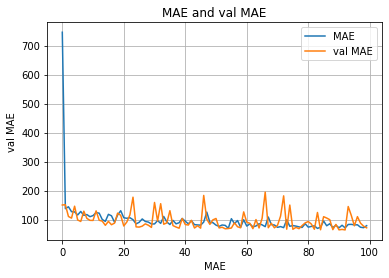

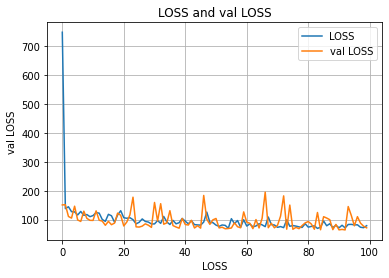

In [35]:
visualize_mae_loss(history_aud_4_layers_regularized)

## Evaluating the forecast

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
23/23 [==============================] - 0s 4ms/step
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
114/114 [==============================] - 0s 4ms/step


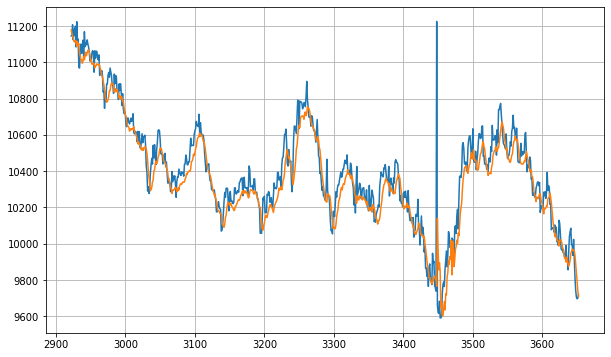

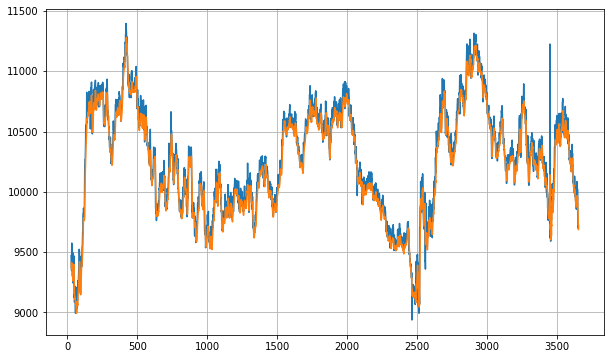

In [36]:
dnn_forecast_aud_model_4_layers_regularized = evaluate_forecast(aud_model_4_layers_regularized, 
                                                                G.aud_times, 
                                                                G.aud_series, 
                                                                aud_time_valid, 
                                                                aud_series_valid,
                                                                G.SPLIT_TIME, -1, 
                                                                G.WINDOW_SIZE, 
                                                                G.BATCH_SIZE)

In [37]:
metrics_aud_model_4_layers_regularized = compute_metrics(aud_series_valid, dnn_forecast_aud_model_4_layers_regularized)
metrics_aud_model_4_layers_regularized

{'mae': 332.52908, 'mse': 180267.77, 'rmse': 400.83246, 'mape': 3.18662}

In [38]:
print(f'2 last Actual Price = {aud_series_valid[-2:]}, Predicted Price = {dnn_forecast_aud_model_4_layers_regularized[-2:]}')

2 last Actual Price = [[9699.881962]
 [9719.609412]], Predicted Price = [9743.213 9708.933]


## Did the same for 2 other currencies

GBP

In [39]:
# Create and test model
gbp_model_4_layers_regularized = create_model_regularized_4_layers(model_name='GBP')

# Get initial weights
init_weights = gbp_model_4_layers_regularized.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
gbp_model_4_layers_regularized.set_weights(init_weights)

# Print the model summary
gbp_model_4_layers_regularized.summary()

Model: "GBP_model_regularized_4_layers"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 14,337
Trainable params: 14,337
Non-trainable params: 0
_________________________________________________________________


In [40]:
# Run the training with dynamic LR
history_gbp_4_layers_regularized = compile_model(gbp_train_set, gbp_model_4_layers_regularized, gbp_valid_set)

Epoch 1/100
     87/Unknown - 1s 3ms/step - loss: 715.1625 - mae: 714.3976INFO:tensorflow:Assets written to: fixed_model/5\assets


INFO:tensorflow:Assets written to: fixed_model/5\assets


91/91 [==============================] - 2s 15ms/step - loss: 697.7181 - mae: 696.9653 - val_loss: 283.3747 - val_mae: 282.9391
Epoch 2/100
91/91 [==============================] - 1s 4ms/step - loss: 429.7175 - mae: 429.3901 - val_loss: 391.2437 - val_mae: 390.9815
Epoch 3/100
88/91 [============================>.] - ETA: 0s - loss: 327.8078 - mae: 327.5644INFO:tensorflow:Assets written to: fixed_model/5\assets


INFO:tensorflow:Assets written to: fixed_model/5\assets


91/91 [==============================] - 1s 13ms/step - loss: 333.0709 - mae: 332.8278 - val_loss: 172.8205 - val_mae: 172.5880
Epoch 4/100
91/91 [==============================] - 1s 4ms/step - loss: 355.0300 - mae: 354.8019 - val_loss: 415.4323 - val_mae: 415.2062
Epoch 5/100
91/91 [==============================] - 1s 4ms/step - loss: 324.7119 - mae: 324.4858 - val_loss: 248.3857 - val_mae: 248.1599
Epoch 6/100
91/91 [==============================] - 1s 4ms/step - loss: 237.9192 - mae: 237.6942 - val_loss: 300.7162 - val_mae: 300.4914
Epoch 7/100
62/91 [===================>..........] - ETA: 0s - loss: 391.1213 - mae: 390.8966INFO:tensorflow:Assets written to: fixed_model/5\assets


INFO:tensorflow:Assets written to: fixed_model/5\assets


91/91 [==============================] - 1s 15ms/step - loss: 406.6698 - mae: 406.4455 - val_loss: 136.2244 - val_mae: 135.9997
Epoch 8/100
78/91 [========================>.....] - ETA: 0s - loss: 317.6854 - mae: 317.4620INFO:tensorflow:Assets written to: fixed_model/5\assets


INFO:tensorflow:Assets written to: fixed_model/5\assets


91/91 [==============================] - 1s 13ms/step - loss: 297.9338 - mae: 297.7105 - val_loss: 123.5510 - val_mae: 123.3267
Epoch 9/100
91/91 [==============================] - 1s 5ms/step - loss: 254.7392 - mae: 254.5166 - val_loss: 483.7270 - val_mae: 483.5051
Epoch 10/100
91/91 [==============================] - 1s 4ms/step - loss: 256.6635 - mae: 256.4416 - val_loss: 309.4432 - val_mae: 309.2215
Epoch 11/100
91/91 [==============================] - 1s 4ms/step - loss: 285.8457 - mae: 285.6236 - val_loss: 192.9833 - val_mae: 192.7619
Epoch 12/100
91/91 [==============================] - 1s 4ms/step - loss: 198.2161 - mae: 197.9933 - val_loss: 150.9754 - val_mae: 150.7520
Epoch 13/100
91/91 [==============================] - 0s 4ms/step - loss: 223.4390 - mae: 223.2157 - val_loss: 131.5284 - val_mae: 131.3044
Epoch 14/100
91/91 [==============================] - 0s 4ms/step - loss: 255.4198 - mae: 255.1953 - val_loss: 276.5091 - val_mae: 276.2842
Epoch 15/100
91/91 [=============

INFO:tensorflow:Assets written to: fixed_model/5\assets


91/91 [==============================] - 1s 12ms/step - loss: 200.9563 - mae: 200.7260 - val_loss: 95.1257 - val_mae: 94.8952
Epoch 21/100
91/91 [==============================] - 1s 4ms/step - loss: 186.7404 - mae: 186.5101 - val_loss: 164.3732 - val_mae: 164.1430
Epoch 22/100
87/91 [===========================>..] - ETA: 0s - loss: 188.7398 - mae: 188.5098INFO:tensorflow:Assets written to: fixed_model/5\assets


INFO:tensorflow:Assets written to: fixed_model/5\assets


91/91 [==============================] - 1s 13ms/step - loss: 188.7523 - mae: 188.5222 - val_loss: 94.3268 - val_mae: 94.0963
Epoch 23/100
91/91 [==============================] - ETA: 0s - loss: 194.4893 - mae: 194.2598INFO:tensorflow:Assets written to: fixed_model/5\assets


INFO:tensorflow:Assets written to: fixed_model/5\assets


91/91 [==============================] - 1s 12ms/step - loss: 194.4893 - mae: 194.2598 - val_loss: 93.4077 - val_mae: 93.1775
Epoch 24/100
91/91 [==============================] - 1s 4ms/step - loss: 191.7924 - mae: 191.5632 - val_loss: 95.5416 - val_mae: 95.3129
Epoch 25/100
91/91 [==============================] - 1s 4ms/step - loss: 215.1969 - mae: 214.9688 - val_loss: 195.0269 - val_mae: 194.7993
Epoch 26/100
91/91 [==============================] - 1s 4ms/step - loss: 253.7379 - mae: 253.5107 - val_loss: 292.2614 - val_mae: 292.0348
Epoch 27/100
91/91 [==============================] - 1s 4ms/step - loss: 167.8355 - mae: 167.6089 - val_loss: 94.2414 - val_mae: 94.0145
Epoch 28/100
59/91 [==================>...........] - ETA: 0s - loss: 146.7875 - mae: 146.5614INFO:tensorflow:Assets written to: fixed_model/5\assets


INFO:tensorflow:Assets written to: fixed_model/5\assets


91/91 [==============================] - 1s 13ms/step - loss: 160.8990 - mae: 160.6727 - val_loss: 92.7410 - val_mae: 92.5155
Epoch 29/100
91/91 [==============================] - 1s 4ms/step - loss: 178.6263 - mae: 178.4011 - val_loss: 140.9854 - val_mae: 140.7600
Epoch 30/100
91/91 [==============================] - 1s 4ms/step - loss: 175.7455 - mae: 175.5210 - val_loss: 314.2242 - val_mae: 314.0002
Epoch 31/100
91/91 [==============================] - 1s 4ms/step - loss: 214.7955 - mae: 214.5717 - val_loss: 412.0186 - val_mae: 411.7957
Epoch 32/100
91/91 [==============================] - 1s 4ms/step - loss: 263.3498 - mae: 263.1268 - val_loss: 174.2977 - val_mae: 174.0751
Epoch 33/100
74/91 [=======================>......] - ETA: 0s - loss: 171.5880 - mae: 171.3653INFO:tensorflow:Assets written to: fixed_model/5\assets


INFO:tensorflow:Assets written to: fixed_model/5\assets


91/91 [==============================] - 1s 13ms/step - loss: 164.9663 - mae: 164.7439 - val_loss: 92.3716 - val_mae: 92.1484
Epoch 34/100
91/91 [==============================] - 1s 5ms/step - loss: 166.3428 - mae: 166.1206 - val_loss: 110.3212 - val_mae: 110.1003
Epoch 35/100
91/91 [==============================] - 1s 5ms/step - loss: 216.3152 - mae: 216.0943 - val_loss: 196.7102 - val_mae: 196.4902
Epoch 36/100
91/91 [==============================] - 1s 4ms/step - loss: 152.9050 - mae: 152.6848 - val_loss: 98.6461 - val_mae: 98.4254
Epoch 37/100
91/91 [==============================] - 1s 4ms/step - loss: 169.8553 - mae: 169.6357 - val_loss: 124.8940 - val_mae: 124.6755
Epoch 38/100
87/91 [===========================>..] - ETA: 0s - loss: 139.8476 - mae: 139.6290INFO:tensorflow:Assets written to: fixed_model/5\assets


INFO:tensorflow:Assets written to: fixed_model/5\assets


91/91 [==============================] - 1s 13ms/step - loss: 138.8913 - mae: 138.6726 - val_loss: 91.2124 - val_mae: 90.9935
Epoch 39/100
91/91 [==============================] - 1s 4ms/step - loss: 165.7840 - mae: 165.5651 - val_loss: 177.1664 - val_mae: 176.9479
Epoch 40/100
91/91 [==============================] - 1s 5ms/step - loss: 153.2859 - mae: 153.0679 - val_loss: 115.5011 - val_mae: 115.2835
Epoch 41/100
91/91 [==============================] - 1s 4ms/step - loss: 149.1328 - mae: 148.9159 - val_loss: 101.8239 - val_mae: 101.6075
Epoch 42/100
91/91 [==============================] - 1s 4ms/step - loss: 201.8647 - mae: 201.6483 - val_loss: 94.4225 - val_mae: 94.2052
Epoch 43/100
91/91 [==============================] - 1s 4ms/step - loss: 158.5746 - mae: 158.3594 - val_loss: 215.2961 - val_mae: 215.0818
Epoch 44/100
91/91 [==============================] - 1s 5ms/step - loss: 182.6413 - mae: 182.4268 - val_loss: 139.8535 - val_mae: 139.6398
Epoch 45/100
91/91 [================

INFO:tensorflow:Assets written to: fixed_model/5\assets


91/91 [==============================] - 1s 15ms/step - loss: 146.3284 - mae: 146.1159 - val_loss: 90.5740 - val_mae: 90.3609
Epoch 47/100
91/91 [==============================] - 1s 4ms/step - loss: 136.7897 - mae: 136.5771 - val_loss: 95.1124 - val_mae: 94.8995
Epoch 48/100
91/91 [==============================] - 1s 5ms/step - loss: 170.8015 - mae: 170.5901 - val_loss: 243.1220 - val_mae: 242.9118
Epoch 49/100
91/91 [==============================] - 1s 4ms/step - loss: 185.0427 - mae: 184.8324 - val_loss: 232.8779 - val_mae: 232.6686
Epoch 50/100
91/91 [==============================] - 1s 4ms/step - loss: 164.6156 - mae: 164.4057 - val_loss: 128.8093 - val_mae: 128.6001
Epoch 51/100
91/91 [==============================] - 1s 5ms/step - loss: 152.9375 - mae: 152.7290 - val_loss: 118.0584 - val_mae: 117.8497
Epoch 52/100
85/91 [===========================>..] - ETA: 0s - loss: 146.9676 - mae: 146.7592INFO:tensorflow:Assets written to: fixed_model/5\assets


INFO:tensorflow:Assets written to: fixed_model/5\assets


91/91 [==============================] - 1s 12ms/step - loss: 145.9081 - mae: 145.6997 - val_loss: 87.8530 - val_mae: 87.6451
Epoch 53/100
91/91 [==============================] - 1s 4ms/step - loss: 155.9468 - mae: 155.7393 - val_loss: 241.2193 - val_mae: 241.0130
Epoch 54/100
91/91 [==============================] - 1s 4ms/step - loss: 152.4421 - mae: 152.2355 - val_loss: 113.1565 - val_mae: 112.9508
Epoch 55/100
91/91 [==============================] - 1s 4ms/step - loss: 158.3423 - mae: 158.1370 - val_loss: 210.3580 - val_mae: 210.1530
Epoch 56/100
91/91 [==============================] - 1s 5ms/step - loss: 166.1020 - mae: 165.8974 - val_loss: 210.8772 - val_mae: 210.6735
Epoch 57/100
91/91 [==============================] - 1s 4ms/step - loss: 210.2784 - mae: 210.0750 - val_loss: 160.4067 - val_mae: 160.2040
Epoch 58/100
91/91 [==============================] - 1s 4ms/step - loss: 199.5845 - mae: 199.3818 - val_loss: 271.8591 - val_mae: 271.6574
Epoch 59/100
91/91 [==============

INFO:tensorflow:Assets written to: fixed_model/5\assets


91/91 [==============================] - 1s 13ms/step - loss: 140.8129 - mae: 140.6225 - val_loss: 85.9104 - val_mae: 85.7206
Epoch 72/100
91/91 [==============================] - 1s 5ms/step - loss: 153.3405 - mae: 153.1507 - val_loss: 137.2709 - val_mae: 137.0821
Epoch 73/100
91/91 [==============================] - 1s 4ms/step - loss: 159.3196 - mae: 159.1308 - val_loss: 179.4690 - val_mae: 179.2817
Epoch 74/100
91/91 [==============================] - 1s 5ms/step - loss: 136.3659 - mae: 136.1784 - val_loss: 146.8768 - val_mae: 146.6904
Epoch 75/100
91/91 [==============================] - 1s 4ms/step - loss: 179.2336 - mae: 179.0474 - val_loss: 155.5113 - val_mae: 155.3263
Epoch 76/100
91/91 [==============================] - 1s 4ms/step - loss: 145.0215 - mae: 144.8360 - val_loss: 118.6210 - val_mae: 118.4351
Epoch 77/100
91/91 [==============================] - 1s 4ms/step - loss: 135.6489 - mae: 135.4645 - val_loss: 145.3249 - val_mae: 145.1415
Epoch 78/100
91/91 [==============

INFO:tensorflow:Assets written to: fixed_model/5\assets


91/91 [==============================] - 2s 17ms/step - loss: 137.9374 - mae: 137.7561 - val_loss: 85.1685 - val_mae: 84.9860
Epoch 82/100
91/91 [==============================] - 1s 6ms/step - loss: 176.0234 - mae: 175.8440 - val_loss: 133.5335 - val_mae: 133.3542
Epoch 83/100
91/91 [==============================] - 1s 5ms/step - loss: 190.0620 - mae: 189.8839 - val_loss: 116.2788 - val_mae: 116.1008
Epoch 84/100
91/91 [==============================] - 1s 5ms/step - loss: 136.9797 - mae: 136.8022 - val_loss: 97.3950 - val_mae: 97.2183
Epoch 85/100
91/91 [==============================] - 1s 5ms/step - loss: 156.1150 - mae: 155.9389 - val_loss: 88.6929 - val_mae: 88.5166
Epoch 86/100
91/91 [==============================] - 1s 5ms/step - loss: 172.5071 - mae: 172.3319 - val_loss: 96.4863 - val_mae: 96.3111
Epoch 87/100
91/91 [==============================] - 1s 4ms/step - loss: 150.8525 - mae: 150.6782 - val_loss: 89.7114 - val_mae: 89.5385
Epoch 88/100
91/91 [======================

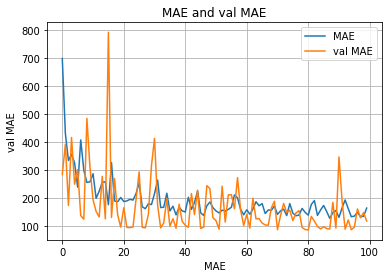

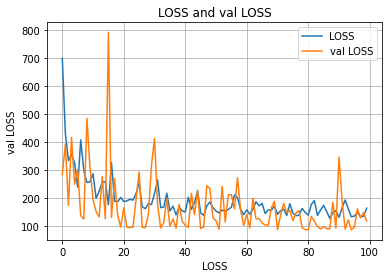

In [41]:
visualize_mae_loss(history_gbp_4_layers_regularized)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
23/23 [==============================] - 0s 4ms/step
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
114/114 [==============================] - 0s 4ms/step


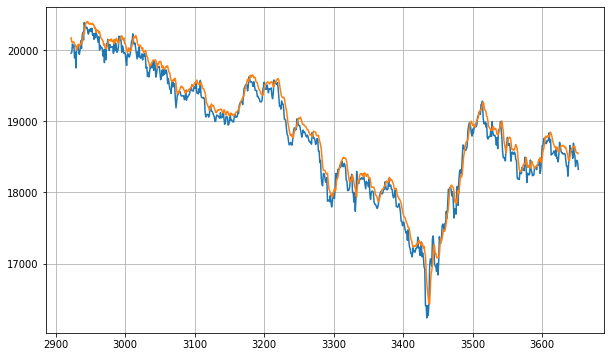

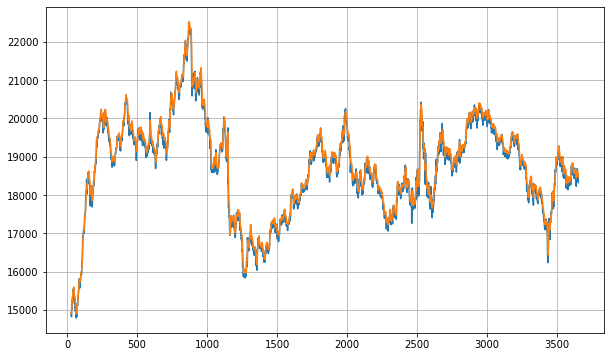

In [42]:
dnn_forecast_gbp_model_4_layers_regularized = evaluate_forecast(gbp_model_4_layers_regularized, 
                                                                G.gbp_times, 
                                                                G.gbp_series, 
                                                                gbp_time_valid, 
                                                                gbp_series_valid,
                                                                G.SPLIT_TIME, -1, 
                                                                G.WINDOW_SIZE, 
                                                                G.BATCH_SIZE)

In [43]:
metrics_gbp_model_4_layers_regularized = compute_metrics(gbp_series_valid, dnn_forecast_gbp_model_4_layers_regularized)
metrics_gbp_model_4_layers_regularized

{'mae': 969.21423, 'mse': 1451302.0, 'rmse': 1159.0287, 'mape': 5.197026}

In [44]:
print(f'2 last Actual Price = {gbp_series_valid[-2:]}, Predicted Price = {dnn_forecast_gbp_model_4_layers_regularized[-2:]}')

2 last Actual Price = [[18421.208189]
 [18322.202251]], Predicted Price = [18555.484 18543.59 ]


SGD

In [45]:
# Create and test model
sgd_model_4_layers_regularized = create_model_regularized_4_layers(model_name='SGD')

# Get initial weights
init_weights = sgd_model_4_layers_regularized.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
sgd_model_4_layers_regularized.set_weights(init_weights)

# Print the model summary
sgd_model_4_layers_regularized.summary()

Model: "SGD_model_regularized_4_layers"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 14,337
Trainable params: 14,337
Non-trainable params: 0
_________________________________________________________________


In [46]:
# Run the training with dynamic LR
history_sgd_4_layers_regularized = compile_model(sgd_train_set, sgd_model_4_layers_regularized, sgd_valid_set)

Epoch 1/100
     78/Unknown - 1s 3ms/step - loss: 740.3581 - mae: 739.6086INFO:tensorflow:Assets written to: fixed_model/6\assets


INFO:tensorflow:Assets written to: fixed_model/6\assets


91/91 [==============================] - 2s 14ms/step - loss: 655.4150 - mae: 654.7166 - val_loss: 159.9589 - val_mae: 159.6174
Epoch 2/100
60/91 [==================>...........] - ETA: 0s - loss: 127.1457 - mae: 126.8955INFO:tensorflow:Assets written to: fixed_model/6\assets


INFO:tensorflow:Assets written to: fixed_model/6\assets


91/91 [==============================] - 1s 13ms/step - loss: 131.1217 - mae: 130.9003 - val_loss: 83.0307 - val_mae: 82.8836
Epoch 3/100
91/91 [==============================] - 1s 4ms/step - loss: 126.2051 - mae: 126.0808 - val_loss: 111.9985 - val_mae: 111.8869
Epoch 4/100
91/91 [==============================] - 1s 4ms/step - loss: 134.0342 - mae: 133.9270 - val_loss: 291.0446 - val_mae: 290.9410
Epoch 5/100
60/91 [==================>...........] - ETA: 0s - loss: 134.6988 - mae: 134.5946INFO:tensorflow:Assets written to: fixed_model/6\assets


INFO:tensorflow:Assets written to: fixed_model/6\assets


91/91 [==============================] - 1s 12ms/step - loss: 127.3203 - mae: 127.2164 - val_loss: 82.6970 - val_mae: 82.5932
Epoch 6/100
91/91 [==============================] - 1s 4ms/step - loss: 116.7491 - mae: 116.6462 - val_loss: 171.6730 - val_mae: 171.5714
Epoch 7/100
91/91 [==============================] - 1s 4ms/step - loss: 131.3228 - mae: 131.2208 - val_loss: 84.8000 - val_mae: 84.6963
Epoch 8/100
91/91 [==============================] - 1s 5ms/step - loss: 110.1549 - mae: 110.0527 - val_loss: 131.8905 - val_mae: 131.7893
Epoch 9/100
91/91 [==============================] - 1s 4ms/step - loss: 111.4739 - mae: 111.3722 - val_loss: 132.7307 - val_mae: 132.6301
Epoch 10/100
78/91 [========================>.....] - ETA: 0s - loss: 134.5086 - mae: 134.4081INFO:tensorflow:Assets written to: fixed_model/6\assets


INFO:tensorflow:Assets written to: fixed_model/6\assets


91/91 [==============================] - 2s 16ms/step - loss: 137.2422 - mae: 137.1418 - val_loss: 78.3961 - val_mae: 78.2947
Epoch 11/100
91/91 [==============================] - 1s 4ms/step - loss: 137.7897 - mae: 137.6886 - val_loss: 131.1594 - val_mae: 131.0597
Epoch 12/100
88/91 [============================>.] - ETA: 0s - loss: 100.4501 - mae: 100.3489INFO:tensorflow:Assets written to: fixed_model/6\assets


INFO:tensorflow:Assets written to: fixed_model/6\assets


91/91 [==============================] - 1s 13ms/step - loss: 100.3497 - mae: 100.2485 - val_loss: 76.0392 - val_mae: 75.9381
Epoch 13/100
90/91 [============================>.] - ETA: 0s - loss: 115.2930 - mae: 115.1895INFO:tensorflow:Assets written to: fixed_model/6\assets


INFO:tensorflow:Assets written to: fixed_model/6\assets


91/91 [==============================] - 1s 13ms/step - loss: 115.3231 - mae: 115.2196 - val_loss: 60.2975 - val_mae: 60.1912
Epoch 14/100
89/91 [============================>.] - ETA: 0s - loss: 88.7822 - mae: 88.6765INFO:tensorflow:Assets written to: fixed_model/6\assets


INFO:tensorflow:Assets written to: fixed_model/6\assets


91/91 [==============================] - 1s 12ms/step - loss: 88.4560 - mae: 88.3502 - val_loss: 57.1826 - val_mae: 57.0748
Epoch 15/100
91/91 [==============================] - 1s 5ms/step - loss: 96.8511 - mae: 96.7429 - val_loss: 128.7433 - val_mae: 128.6350
Epoch 16/100
91/91 [==============================] - 1s 4ms/step - loss: 117.0971 - mae: 116.9875 - val_loss: 184.9894 - val_mae: 184.8810
Epoch 17/100
91/91 [==============================] - 1s 5ms/step - loss: 90.0215 - mae: 89.9113 - val_loss: 59.9901 - val_mae: 59.8804
Epoch 18/100
91/91 [==============================] - 1s 5ms/step - loss: 107.8003 - mae: 107.6911 - val_loss: 248.0229 - val_mae: 247.9155
Epoch 19/100
91/91 [==============================] - 1s 6ms/step - loss: 112.4565 - mae: 112.3487 - val_loss: 74.3525 - val_mae: 74.2451
Epoch 20/100
91/91 [==============================] - 1s 5ms/step - loss: 106.6940 - mae: 106.5872 - val_loss: 179.4758 - val_mae: 179.3701
Epoch 21/100
91/91 [========================

INFO:tensorflow:Assets written to: fixed_model/6\assets


91/91 [==============================] - 1s 12ms/step - loss: 74.9215 - mae: 74.8194 - val_loss: 47.3225 - val_mae: 47.2196
Epoch 30/100
91/91 [==============================] - 1s 4ms/step - loss: 76.5446 - mae: 76.4431 - val_loss: 125.1978 - val_mae: 125.0982
Epoch 31/100
91/91 [==============================] - 1s 4ms/step - loss: 81.1578 - mae: 81.0575 - val_loss: 59.8783 - val_mae: 59.7786
Epoch 32/100
91/91 [==============================] - 1s 5ms/step - loss: 77.2524 - mae: 77.1516 - val_loss: 94.9843 - val_mae: 94.8862
Epoch 33/100
91/91 [==============================] - 1s 5ms/step - loss: 74.7134 - mae: 74.6131 - val_loss: 84.8016 - val_mae: 84.7041
Epoch 34/100
91/91 [==============================] - 1s 4ms/step - loss: 140.5919 - mae: 140.4951 - val_loss: 48.0053 - val_mae: 47.9064
Epoch 35/100
91/91 [==============================] - 1s 5ms/step - loss: 68.2083 - mae: 68.1117 - val_loss: 76.8033 - val_mae: 76.7081
Epoch 36/100
91/91 [==============================] - 1s

INFO:tensorflow:Assets written to: fixed_model/6\assets


91/91 [==============================] - 1s 13ms/step - loss: 76.0545 - mae: 75.9633 - val_loss: 46.2023 - val_mae: 46.1101
Epoch 42/100
91/91 [==============================] - 1s 5ms/step - loss: 85.2917 - mae: 85.2020 - val_loss: 167.3801 - val_mae: 167.2917
Epoch 43/100
91/91 [==============================] - 1s 5ms/step - loss: 92.1561 - mae: 92.0680 - val_loss: 123.1755 - val_mae: 123.0881
Epoch 44/100
91/91 [==============================] - 1s 5ms/step - loss: 88.3008 - mae: 88.2129 - val_loss: 59.3967 - val_mae: 59.3090
Epoch 45/100
91/91 [==============================] - 1s 5ms/step - loss: 63.2014 - mae: 63.1141 - val_loss: 65.8643 - val_mae: 65.7784
Epoch 46/100
91/91 [==============================] - 1s 4ms/step - loss: 80.4532 - mae: 80.3669 - val_loss: 59.8039 - val_mae: 59.7189
Epoch 47/100
91/91 [==============================] - 1s 5ms/step - loss: 85.9475 - mae: 85.8629 - val_loss: 49.1054 - val_mae: 49.0206
Epoch 48/100
84/91 [==========================>...] - ET

INFO:tensorflow:Assets written to: fixed_model/6\assets


91/91 [==============================] - 1s 14ms/step - loss: 65.6520 - mae: 65.5675 - val_loss: 39.2637 - val_mae: 39.1787
Epoch 49/100
91/91 [==============================] - 1s 5ms/step - loss: 93.4230 - mae: 93.3406 - val_loss: 74.5039 - val_mae: 74.4224
Epoch 50/100
91/91 [==============================] - 1s 5ms/step - loss: 68.7026 - mae: 68.6203 - val_loss: 42.6413 - val_mae: 42.5583
Epoch 51/100
91/91 [==============================] - 1s 5ms/step - loss: 77.3898 - mae: 77.3085 - val_loss: 47.0084 - val_mae: 46.9273
Epoch 52/100
91/91 [==============================] - 1s 5ms/step - loss: 66.3525 - mae: 66.2725 - val_loss: 113.0112 - val_mae: 112.9330
Epoch 53/100
91/91 [==============================] - 1s 5ms/step - loss: 75.9710 - mae: 75.8916 - val_loss: 41.0480 - val_mae: 40.9682
Epoch 54/100
91/91 [==============================] - 1s 5ms/step - loss: 60.3176 - mae: 60.2394 - val_loss: 46.7176 - val_mae: 46.6396
Epoch 55/100
91/91 [==============================] - 1s 5

INFO:tensorflow:Assets written to: fixed_model/6\assets


91/91 [==============================] - 1s 13ms/step - loss: 63.6085 - mae: 63.5415 - val_loss: 37.4621 - val_mae: 37.3937
Epoch 64/100
91/91 [==============================] - 1s 5ms/step - loss: 61.0717 - mae: 61.0057 - val_loss: 49.0341 - val_mae: 48.9675
Epoch 65/100
83/91 [==========================>...] - ETA: 0s - loss: 58.5775 - mae: 58.5129INFO:tensorflow:Assets written to: fixed_model/6\assets


INFO:tensorflow:Assets written to: fixed_model/6\assets


91/91 [==============================] - 2s 16ms/step - loss: 59.7403 - mae: 59.6755 - val_loss: 37.2543 - val_mae: 37.1874
Epoch 66/100
91/91 [==============================] - 1s 5ms/step - loss: 64.8281 - mae: 64.7638 - val_loss: 53.4748 - val_mae: 53.4116
Epoch 67/100
91/91 [==============================] - 1s 5ms/step - loss: 63.7430 - mae: 63.6804 - val_loss: 60.6648 - val_mae: 60.6038
Epoch 68/100
91/91 [==============================] - 1s 5ms/step - loss: 83.1471 - mae: 83.0857 - val_loss: 39.5245 - val_mae: 39.4638
Epoch 69/100
91/91 [==============================] - 1s 5ms/step - loss: 61.0594 - mae: 60.9990 - val_loss: 72.2361 - val_mae: 72.1775
Epoch 70/100
91/91 [==============================] - 1s 5ms/step - loss: 57.6184 - mae: 57.5589 - val_loss: 64.6472 - val_mae: 64.5900
Epoch 71/100
91/91 [==============================] - 1s 5ms/step - loss: 67.5241 - mae: 67.4675 - val_loss: 93.4181 - val_mae: 93.3628
Epoch 72/100
82/91 [==========================>...] - ETA: 0

INFO:tensorflow:Assets written to: fixed_model/6\assets


91/91 [==============================] - 1s 13ms/step - loss: 70.1956 - mae: 70.1404 - val_loss: 36.3515 - val_mae: 36.2943
Epoch 73/100
91/91 [==============================] - 1s 4ms/step - loss: 60.4751 - mae: 60.4200 - val_loss: 50.0138 - val_mae: 49.9599
Epoch 74/100
65/91 [====================>.........] - ETA: 0s - loss: 60.0536 - mae: 59.9995INFO:tensorflow:Assets written to: fixed_model/6\assets


INFO:tensorflow:Assets written to: fixed_model/6\assets


91/91 [==============================] - 1s 14ms/step - loss: 67.1460 - mae: 67.0927 - val_loss: 36.2527 - val_mae: 36.1997
Epoch 75/100
91/91 [==============================] - 1s 5ms/step - loss: 59.2261 - mae: 59.1744 - val_loss: 49.6846 - val_mae: 49.6339
Epoch 76/100
91/91 [==============================] - 1s 5ms/step - loss: 64.7602 - mae: 64.7096 - val_loss: 47.8810 - val_mae: 47.8304
Epoch 77/100
91/91 [==============================] - 1s 5ms/step - loss: 68.7305 - mae: 68.6824 - val_loss: 42.8176 - val_mae: 42.7680
Epoch 78/100
91/91 [==============================] - 1s 5ms/step - loss: 59.7830 - mae: 59.7346 - val_loss: 117.8526 - val_mae: 117.8075
Epoch 79/100
91/91 [==============================] - 1s 5ms/step - loss: 59.9233 - mae: 59.8770 - val_loss: 110.5061 - val_mae: 110.4619
Epoch 80/100
91/91 [==============================] - 1s 5ms/step - loss: 66.6670 - mae: 66.6228 - val_loss: 48.6343 - val_mae: 48.5900
Epoch 81/100
91/91 [==============================] - 1s

INFO:tensorflow:Assets written to: fixed_model/6\assets


91/91 [==============================] - 1s 13ms/step - loss: 53.0962 - mae: 53.0845 - val_loss: 36.1389 - val_mae: 36.1268
Epoch 100/100
91/91 [==============================] - 1s 4ms/step - loss: 60.1431 - mae: 60.1340 - val_loss: 140.3827 - val_mae: 140.3771


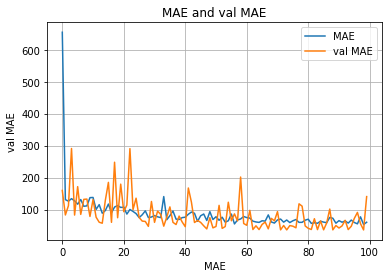

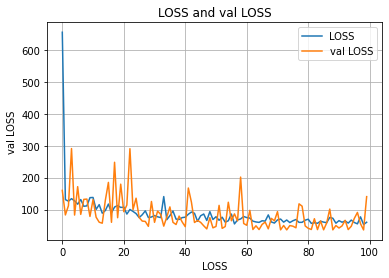

In [47]:
visualize_mae_loss(history_sgd_4_layers_regularized)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
23/23 [==============================] - 0s 4ms/step
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'NoneType' object has no attribute '__dict__'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
114/114 [==============================] - 0s 4ms/step


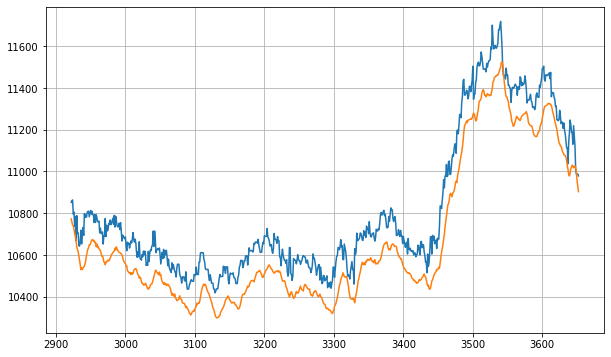

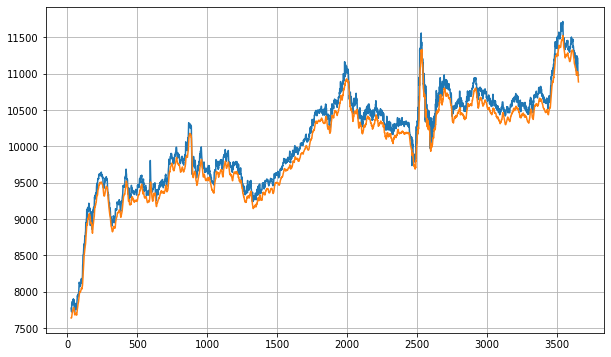

In [48]:
dnn_forecast_sgd_model_4_layers_regularized = evaluate_forecast(sgd_model_4_layers_regularized, 
                                                                G.sgd_times, 
                                                                G.sgd_series, 
                                                                sgd_time_valid, 
                                                                sgd_series_valid,
                                                                G.SPLIT_TIME, -1, 
                                                                G.WINDOW_SIZE, 
                                                                G.BATCH_SIZE)

In [49]:
metrics_sgd_model_4_layers_regularized = compute_metrics(sgd_series_valid, dnn_forecast_sgd_model_4_layers_regularized)
metrics_sgd_model_4_layers_regularized

{'mae': 386.25757, 'mse': 255279.84, 'rmse': 466.06143, 'mape': 3.5175612}

In [50]:
print(f'2 last Actual Price = {sgd_series_valid[-2:]}, Predicted Price = {dnn_forecast_sgd_model_4_layers_regularized[-2:]}')

2 last Actual Price = [[10987.942405]
 [10979.160369]], Predicted Price = [10929.667 10903.59 ]


## Future Predictions

Doing 1 week predictions

In [51]:
into_future = 7

In [52]:
future_forecast_aud_model_5_layers = make_future_forecast(values=G.aud_series,
                                                          model=aud_model_5_layers,
                                                          into_future=into_future,
                                                          window_size=G.WINDOW_SIZE)

future_forecast_gbp_model_5_layers = make_future_forecast(values=G.gbp_series,
                                                          model=gbp_model_5_layers,
                                                          into_future=into_future,
                                                          window_size=G.WINDOW_SIZE)

future_forecast_sgd_model_5_layers = make_future_forecast(values=G.sgd_series,
                                                          model=sgd_model_5_layers,
                                                          into_future=into_future,
                                                          window_size=G.WINDOW_SIZE)

future_forecast_aud_model_4_layers_regularized = make_future_forecast(values=G.aud_series,
                                                                      model=aud_model_4_layers_regularized,
                                                                      into_future=into_future,
                                                                      window_size=G.WINDOW_SIZE)

future_forecast_gbp_model_4_layers_regularized = make_future_forecast(values=G.gbp_series,
                                                                      model=gbp_model_4_layers_regularized,
                                                                      into_future=into_future,
                                                                      window_size=G.WINDOW_SIZE)

future_forecast_sgd_model_4_layers_regularized = make_future_forecast(values=G.sgd_series,
                                                                      model=sgd_model_4_layers_regularized,
                                                                      into_future=into_future,
                                                                      window_size=G.WINDOW_SIZE)

1/1 [==============================] - 0s 42ms/step
Predicting on:
 [[ 9991.164594]
 [10129.656911]
 [10112.958701]
 [10052.054014]
 [ 9973.110625]
 [ 9965.620727]
 [ 9968.598951]
 [ 9950.687169]
 [ 9947.506228]
 [ 9927.536872]
 [ 9940.046811]
 [ 9991.557014]
 [ 9913.167687]
 [ 9917.60924 ]
 [ 9856.107891]
 [ 9961.256773]
 [10040.224458]
 [10066.447283]
 [10085.21644 ]
 [ 9995.16504 ]
 [ 9995.165155]
 [ 9935.947873]
 [10023.99686 ]
 [ 9915.824429]
 [ 9812.169065]
 [ 9743.131115]
 [ 9706.330826]
 [ 9696.280669]
 [ 9699.881962]
 [ 9719.609412]] -> Prediction: 9602.1083984375

1/1 [==============================] - 0s 68ms/step
Predicting on:
 [10129.656911   10112.958701   10052.054014    9973.110625
  9965.620727    9968.598951    9950.687169    9947.506228
  9927.536872    9940.046811    9991.557014    9913.167687
  9917.60924     9856.107891    9961.256773   10040.224458
 10066.447283   10085.21644     9995.16504     9995.165155
  9935.947873   10023.99686     9915.824429    9812.1690

In [56]:
start_future = G.aud_times[-1] + 1
future_time = np.arange(start_future, start_future + into_future)

# Insert last timestep/final price into next time steps
future_time = np.insert(future_time, 0, G.aud_times[-1])

In [57]:
# Future forecasts so the plot connects
future_forecast_aud_model_5_layers = np.insert(future_forecast_aud_model_5_layers, 0, G.aud_series[-1])
future_forecast_gbp_model_5_layers = np.insert(future_forecast_gbp_model_5_layers, 0, G.gbp_series[-1])
future_forecast_sgd_model_5_layers = np.insert(future_forecast_sgd_model_5_layers, 0, G.sgd_series[-1])

future_forecast_aud_model_4_layers_regularized = np.insert(future_forecast_aud_model_4_layers_regularized, 0, G.aud_series[-1])
future_forecast_gbp_model_4_layers_regularized = np.insert(future_forecast_gbp_model_4_layers_regularized, 0, G.gbp_series[-1])
future_forecast_sgd_model_4_layers_regularized = np.insert(future_forecast_sgd_model_4_layers_regularized, 0, G.sgd_series[-1])

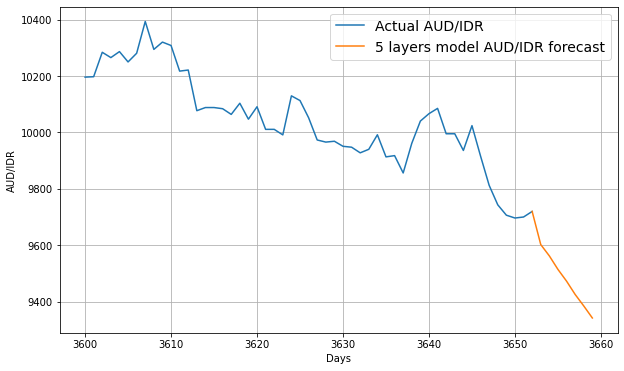

In [58]:
plt.figure(figsize=(10, 6))
plot_future_forecast(G.aud_times, G.aud_series, start=3600, format="-", label="Actual AUD/IDR", xlabel="Days", ylabel="AUD/IDR")
plot_future_forecast(future_time, future_forecast_aud_model_5_layers, format="-", label="5 layers model AUD/IDR forecast", xlabel="Days", ylabel="AUD/IDR")

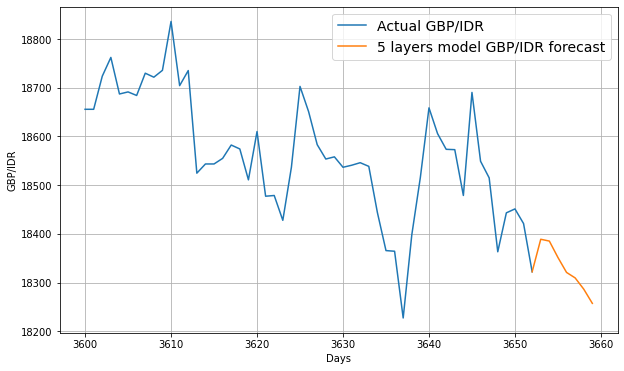

In [59]:
plt.figure(figsize=(10, 6))
plot_future_forecast(G.gbp_times, G.gbp_series, start=3600, format="-", label="Actual GBP/IDR", xlabel="Days", ylabel="GBP/IDR")
plot_future_forecast(future_time, future_forecast_gbp_model_5_layers, format="-", label="5 layers model GBP/IDR forecast", xlabel="Days", ylabel="GBP/IDR")

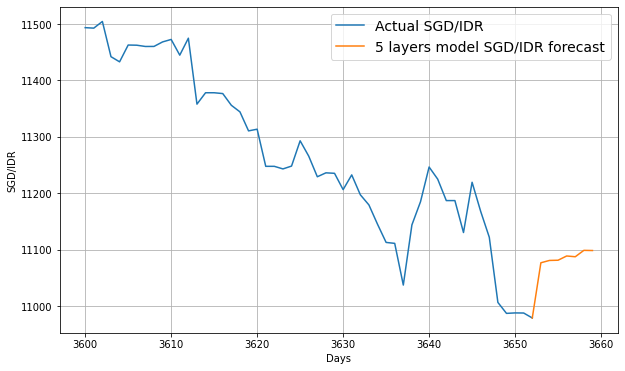

In [60]:
plt.figure(figsize=(10, 6))
plot_future_forecast(G.sgd_times, G.sgd_series, start=3600, format="-", label="Actual SGD/IDR", xlabel="Days", ylabel="SGD/IDR")
plot_future_forecast(future_time, future_forecast_sgd_model_5_layers, format="-", label="5 layers model SGD/IDR forecast", xlabel="Days", ylabel="SGD/IDR")

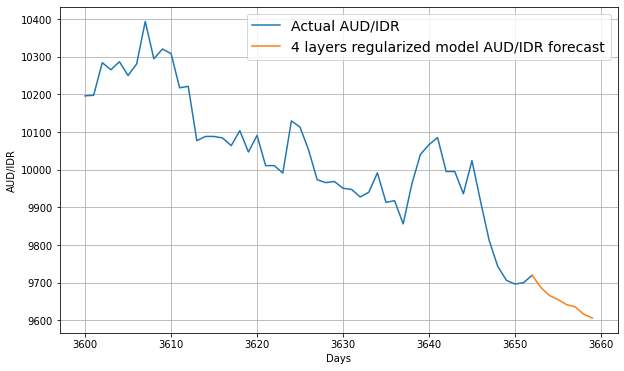

In [61]:
plt.figure(figsize=(10, 6))
plot_future_forecast(G.aud_times, G.aud_series, start=3600, format="-", label="Actual AUD/IDR", xlabel="Days", ylabel="AUD/IDR")
plot_future_forecast(future_time, future_forecast_aud_model_4_layers_regularized, format="-", label="4 layers regularized model AUD/IDR forecast", xlabel="Days", ylabel="AUD/IDR")

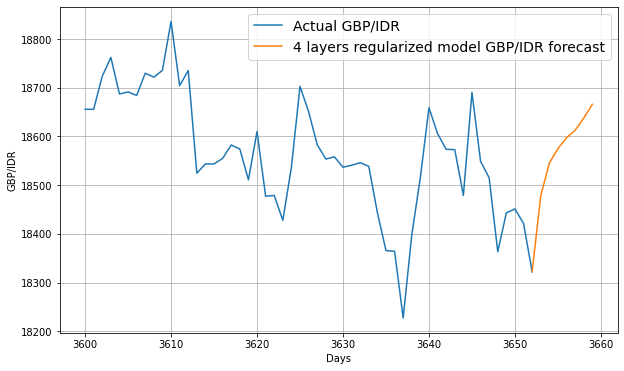

In [62]:
plt.figure(figsize=(10, 6))
plot_future_forecast(G.gbp_times, G.gbp_series, start=3600, format="-", label="Actual GBP/IDR", xlabel="Days", ylabel="GBP/IDR")
plot_future_forecast(future_time, future_forecast_gbp_model_4_layers_regularized, format="-", label="4 layers regularized model GBP/IDR forecast", xlabel="Days", ylabel="GBP/IDR")

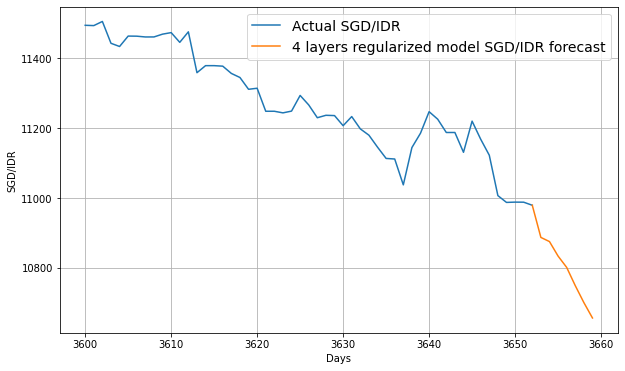

In [63]:
plt.figure(figsize=(10, 6))
plot_future_forecast(G.sgd_times, G.sgd_series, start=3600, format="-", label="Actual SGD/IDR", xlabel="Days", ylabel="SGD/IDR")
plot_future_forecast(future_time, future_forecast_sgd_model_4_layers_regularized, format="-", label="4 layers regularized model SGD/IDR forecast", xlabel="Days", ylabel="SGD/IDR")

## Compare model

In [64]:
model_results = pd.DataFrame({'aud_model_5_layers': metrics_aud_model_5_layers,
                              'gbp_model_5_layers': metrics_gbp_model_5_layers,
                              'sgd_model_5_layers': metrics_sgd_model_5_layers,
                              'aud_model_4_layers_regularized': metrics_aud_model_4_layers_regularized,
                              'gbp_model_4_layers_regularized': metrics_gbp_model_4_layers_regularized,
                              'sgd_model_4_layers_regularized': metrics_sgd_model_4_layers_regularized,}).T

model_results

,mae,mse,rmse,mape
aud_model_5_layers,356.900421,2.027161e+05,420.328583,3.403149
gbp_model_5_layers,964.649109,1.438103e+06,1155.429443,5.154333
sgd_model_5_layers,361.331482,2.401221e+05,474.849487,3.309000
aud_model_4_layers_regularized,332.529083,1.802678e+05,400.832458,3.186620
gbp_model_4_layers_regularized,969.214233,1.451302e+06,1159.028687,5.197026
sgd_model_4_layers_regularized,386.257568,2.552798e+05,466.061432,3.517561
